# Classic Methods Overview
The Classic block demonstrates foundational machine learning approaches applied to university performance data. It is organized into three major parts: **Clustering**, **Classification**, and **Regression**.
- In Clustering, we explore K‑Means, hierarchical clustering (both algorithmic and manual), and interactive 3D visualization to reveal group structures and interpret cluster characteristics.
- In Classification, we examine Pearson correlations, compare a wide range of classifiers, and highlight Random Forest, Decision Tree, and Logistic Regression models with accuracy, confusion matrices, and feature importance insights.
- In Regression, we apply Linear Regression, compare models such as KNN and SVR, and extend to generalized linear models including Poisson and Negative Binomial regression, evaluating predictive accuracy and residual behavior.

Together, these sections provide a clear, structured overview of classical machine learning techniques and their practical application to real-world academic datasets.


##Clustering
This block explores university data using K‑Means, hierarchical clustering (algorithmic and manual), and interactive 3D visualization to reveal group structures and interpret cluster characteristics.


### K‑Means Clustering
We apply K‑Means to standardized university ranking data, explore optimal cluster numbers with the elbow method, and interpret clusters using PCA visualization and centroid analysis.


####Imports

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Custom visualization functions (provided externally)
from functions import *

####Load Data

In [ ]:
# Load dataset
original_data = pd.read_csv("data/times.csv", index_col="university_name")
original_data.head()

world_rank  ... male%
university_name                                    ...      
California Institute of Technology              1  ...  67.0
University of Oxford                            2  ...  54.0
Stanford University                             3  ...  58.0
University of Cambridge                         4  ...  54.0
Massachusetts Institute of Technology           5  ...  63.0

[5 rows x 13 columns]

####Select Features

In [ ]:
X = original_data[[
    "teaching", "international", "research", "citations", "income",
    "num_students", "student_staff_ratio", "international%", "female%", "male%"
]]
X.head()

teaching  international  ...  female%  male%
university_name                                                 ...                
California Institute of Technology         95.6           64.0  ...     33.0   67.0
University of Oxford                       86.5           94.4  ...     46.0   54.0
Stanford University                        92.5           76.3  ...     42.0   58.0
University of Cambridge                    88.2           91.5  ...     46.0   54.0
Massachusetts Institute of Technology      89.4           84.0  ...     37.0   63.0

[5 rows x 10 columns]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, California Institute of Technology to Yuan Ze University
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   teaching             800 non-null    float64
 1   international        800 non-null    float64
 2   research             800 non-null    float64
 3   citations            800 non-null    float64
 4   income               763 non-null    float64
 5   num_students         793 non-null    float64
 6   student_staff_ratio  793 non-null    float64
 7   international%       790 non-null    float64
 8   female%              736 non-null    float64
 9   male%                736 non-null    float64
dtypes: float64(10)
memory usage: 68.8+ KB


####Handle Missing Values

In [ ]:
# Replace missing values with column means
X = X.fillna(X.mean())
X.describe()

teaching  international  ...     female%       male%
count  800.0000     800.000000  ...  800.000000  800.000000
mean    31.5840      48.500375  ...   49.538043   50.461957
std     14.9854      23.690816  ...   11.473152   11.473152
min      9.9000       7.100000  ...    1.000000    0.000000
25%     21.0000      29.450000  ...   46.000000   44.000000
50%     27.0000      45.700000  ...   51.000000   49.000000
75%     37.5000      65.450000  ...   56.000000   54.000000
max     95.6000      99.900000  ...  100.000000   99.000000

[8 rows x 10 columns]

####Standardize Data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

####Distribution Plots (Before Standardization)

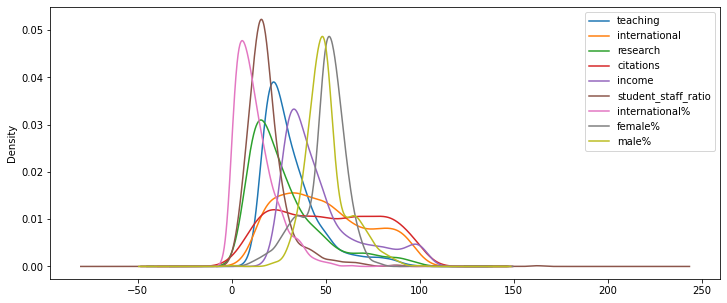

In [ ]:
X1 = pd.DataFrame(X, columns=X.columns)
X1.drop("num_students", axis=1, inplace=True)
X1.plot(kind="density", sharex=True, figsize=(12,5), layout=(10,1))

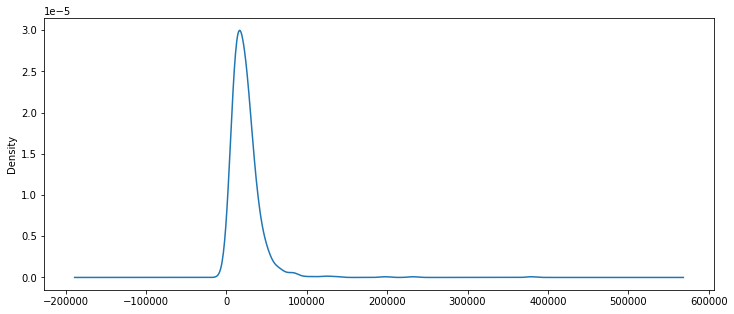

In [ ]:
X2 = pd.DataFrame(X, columns=X.columns)["num_students"]
X2.plot(kind="density", sharex=True, figsize=(12,5), layout=(10,1))

####Distribution Plots (After Standardization)

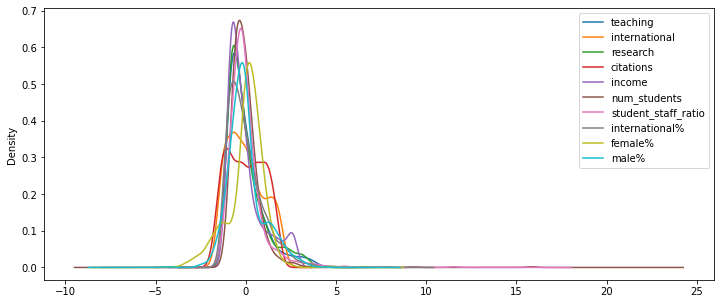

In [ ]:
pd.DataFrame(X_scaled, columns=X.columns).plot(
    kind="density", sharex=True, figsize=(12,5), layout=(10,1)
)

####Fit K‑Means Model

In [ ]:
# K-Means with 3 clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10)
kmeans.fit(X_scaled)

# Cluster assignments
clusters = kmeans.predict(X_scaled)

# Add cluster labels to scaled data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered["cluster"] = clusters
X_scaled_clustered.head()

teaching  ...  cluster
university_name                                  ...         
California Institute of Technology     4.274564  ...        0
University of Oxford                   3.666926  ...        0
Stanford University                    4.067566  ...        0
University of Cambridge                3.780441  ...        0
Massachusetts Institute of Technology  3.860569  ...        0

[5 rows x 11 columns]

####Elbow Method

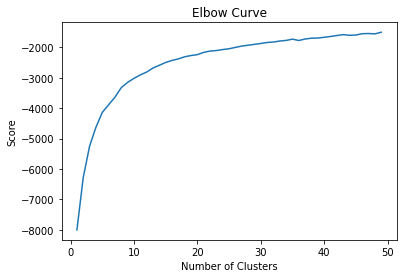

In [ ]:
num_clusters = 50
kmeans_tests = [KMeans(n_clusters=i, init="random", n_init=10) for i in range(1, num_clusters)]
score = [model.fit(X_scaled).score(X_scaled) for model in kmeans_tests]

plt.plot(range(1, num_clusters), score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

"""
Interpretation:
- Curve rises sharply from 1 to ~5 clusters, then flattens.
- Beyond ~10 clusters, variance reduction is minimal.
- Optimal number likely between 5 and 10.
"""

####PCA Visualization

In [ ]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

X_reduced_df = pd.DataFrame(X_reduced, index=X.index, columns=["PC1","PC2"])
X_reduced_df["cluster"] = clusters
X_reduced_df.head()

PC1       PC2  cluster
university_name                                                   
California Institute of Technology     5.555064 -3.811757        0
University of Oxford                   5.977205 -1.462953        0
Stanford University                    5.231170 -2.141250        0
University of Cambridge                5.735713 -1.242813        0
Massachusetts Institute of Technology  5.721362 -2.896713        0

####Cluster Centers in PCA Space

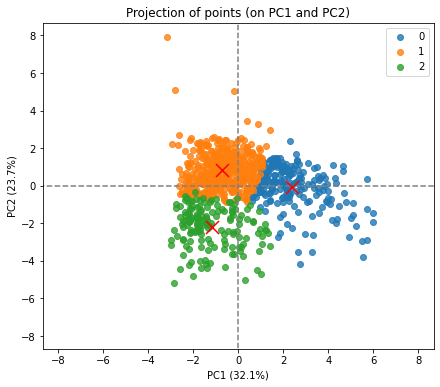

In [ ]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var=clusters, alpha=0.8)

plt.scatter(
    centres_reduced[:,0], centres_reduced[:,1],
    marker="x", s=169, linewidths=3, color="r", zorder=10
)

####Parallel Coordinates Plot (Cluster Interpretation)

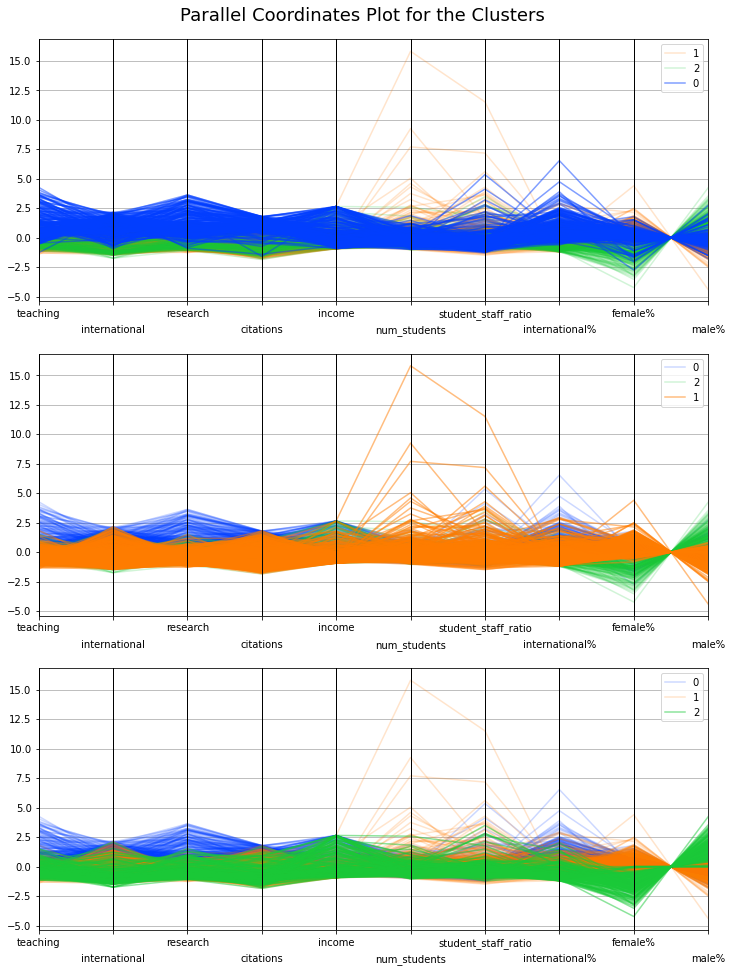

In [ ]:
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

display_parallel_coordinates(X_clustered, 3)

"""
Interpretation:
- Cluster 0 (blue): High teaching & research scores, many international students.
- Cluster 1 (orange): High male ratio, high income.
- Cluster 2 (green): Large student numbers, high student/staff ratio, lower income.
"""

####Centroid Analysis

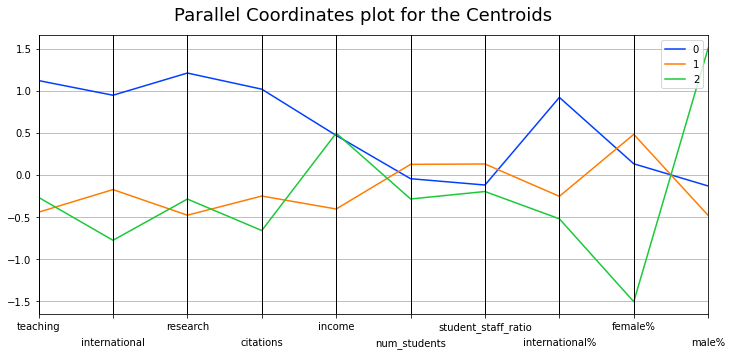

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids["cluster"] = centroids.index

display_parallel_coordinates_centroids(centroids, 10)

"""
Centroids highlight variable differences across clusters,
providing clearer insight into cluster characteristics.
"""

### Hierarchical Tree Clustering
We apply agglomerative hierarchical clustering to standardized university ranking data, explore different cluster counts, and interpret results using dendrograms, PCA visualization, parallel coordinates, and boxplots.


####Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Dendrogram utilities
from scipy.cluster.hierarchy import linkage

# Custom visualization functions
from functions import *

####Load Data

In [ ]:
original_data = pd.read_csv("data/times.csv", index_col="university_name")
original_data.head()

world_rank  ... male%
university_name                                    ...      
California Institute of Technology              1  ...  67.0
University of Oxford                            2  ...  54.0
Stanford University                             3  ...  58.0
University of Cambridge                         4  ...  54.0
Massachusetts Institute of Technology           5  ...  63.0

[5 rows x 13 columns]

####Select Features

In [ ]:
X = original_data[[
    "teaching", "international", "research", "citations", "income",
    "num_students", "student_staff_ratio", "international%", "female%", "male%"
]]
X.head()

teaching  international  ...  female%  male%
university_name                                                 ...                
California Institute of Technology         95.6           64.0  ...     33.0   67.0
University of Oxford                       86.5           94.4  ...     46.0   54.0
Stanford University                        92.5           76.3  ...     42.0   58.0
University of Cambridge                    88.2           91.5  ...     46.0   54.0
Massachusetts Institute of Technology      89.4           84.0  ...     37.0   63.0

[5 rows x 10 columns]

####Handle Missing Values & Standardize

In [ ]:
X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

####Fit Hierarchical Clustering Model

In [ ]:
# Agglomerative clustering with Ward linkage
hiercluster = AgglomerativeClustering(affinity="euclidean", linkage="ward", compute_full_tree=True)

# Example: 3 clusters
hiercluster.set_params(n_clusters=3)
clusters = hiercluster.fit_predict(X_scaled)
print("Cluster counts (3 clusters):", np.bincount(clusters))

array([555, 146,  99])

In [ ]:
# Example: 5 clusters
hiercluster.set_params(n_clusters=5)
clusters = hiercluster.fit_predict(X_scaled)
print("Cluster counts (5 clusters):", np.bincount(clusters))

array([336,  50,  99, 146, 169])

####Add Cluster Labels

In [ ]:
X_scaled_clustered = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_clustered["cluster"] = clusters
X_scaled_clustered.head()

teaching  ...  cluster
university_name                                  ...         
California Institute of Technology     4.274564  ...        2
University of Oxford                   3.666926  ...        2
Stanford University                    4.067566  ...        2
University of Cambridge                3.780441  ...        2
Massachusetts Institute of Technology  3.860569  ...        2

[5 rows x 11 columns]

####Cluster Sizes

In [ ]:
X_scaled_clustered["cluster"].value_counts()

0    336
4    169
3    146
2     99
1     50
Name: cluster, dtype: int64

####Dendrogram (Sample Cluster)

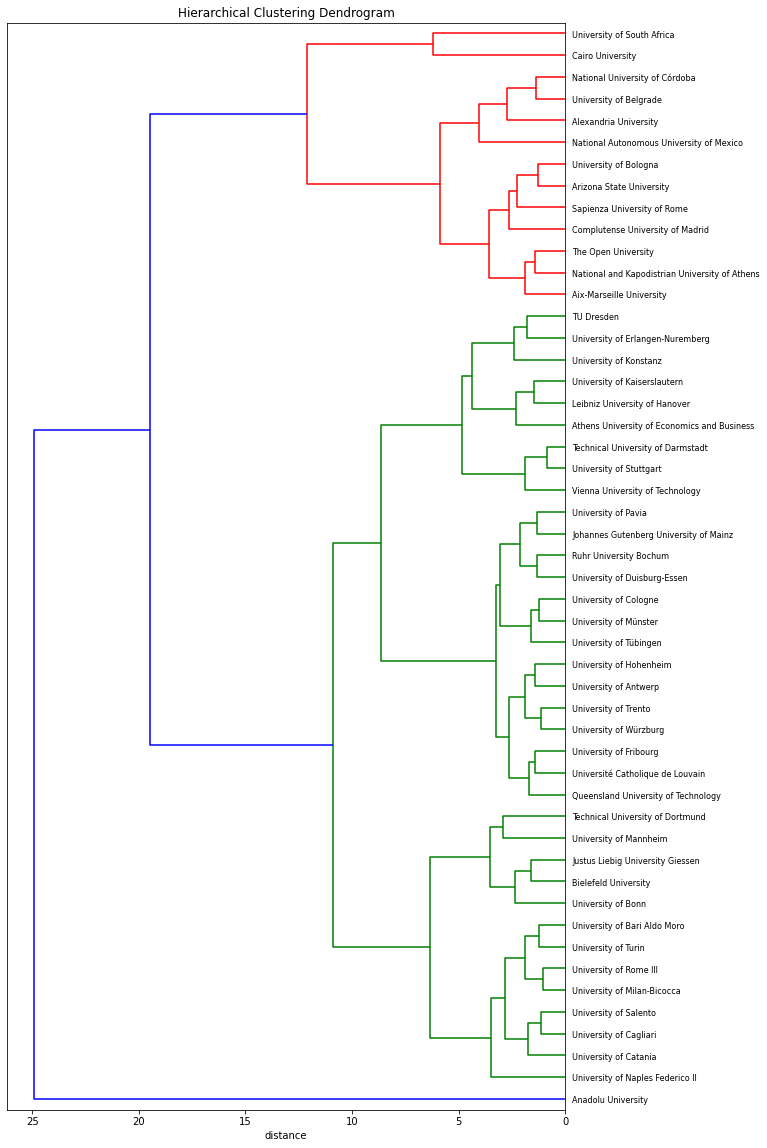

In [ ]:
sample = X_scaled_clustered[X_scaled_clustered.cluster==1]
Z = linkage(sample, "ward")
names = sample.index

plot_dendrogram(Z, names, figsize=(10,20))

####PCA Visualization

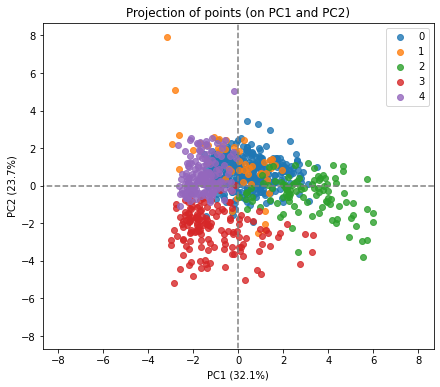

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_reduced = pca.transform(X_scaled)

display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var=clusters, alpha=0.8)

####Parallel Coordinates (Cluster Interpretation)

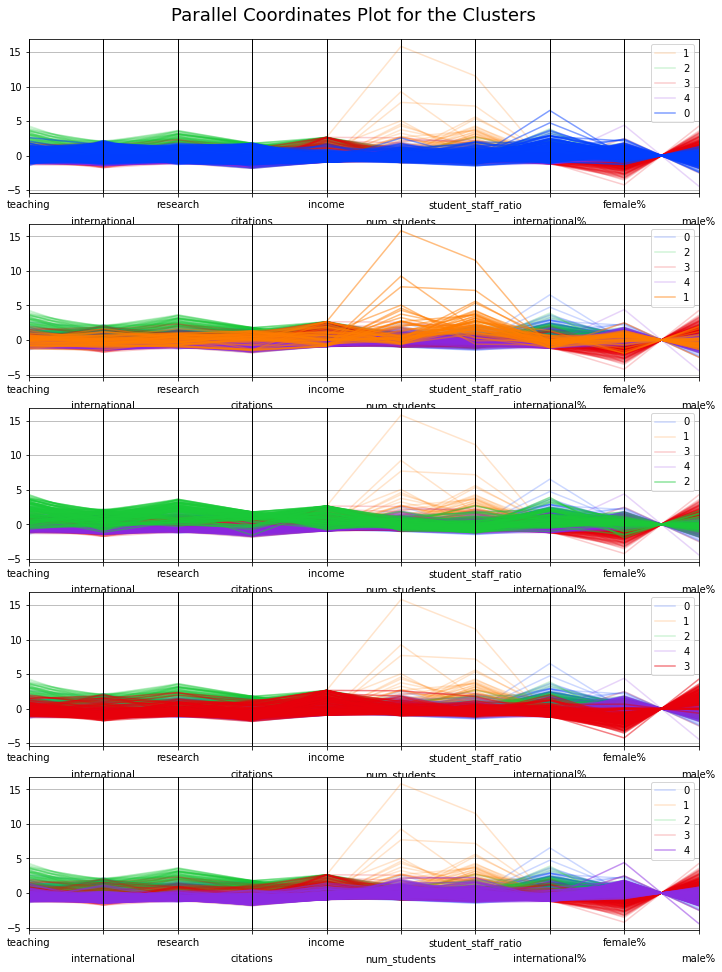

In [ ]:
X_clustered = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X_clustered["cluster"] = clusters

display_parallel_coordinates(X_clustered, 5)

####Cluster Means

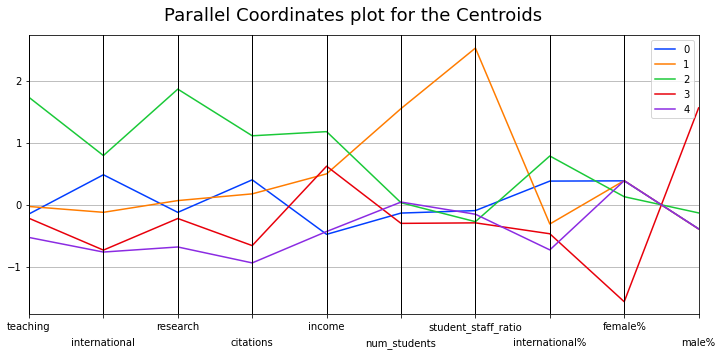

In [ ]:
means = X_clustered.groupby("cluster").mean()
display_parallel_coordinates_centroids(means.reset_index(), 5)

####Boxplots per Cluster

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3205d76eb8>,
      dtype=object)

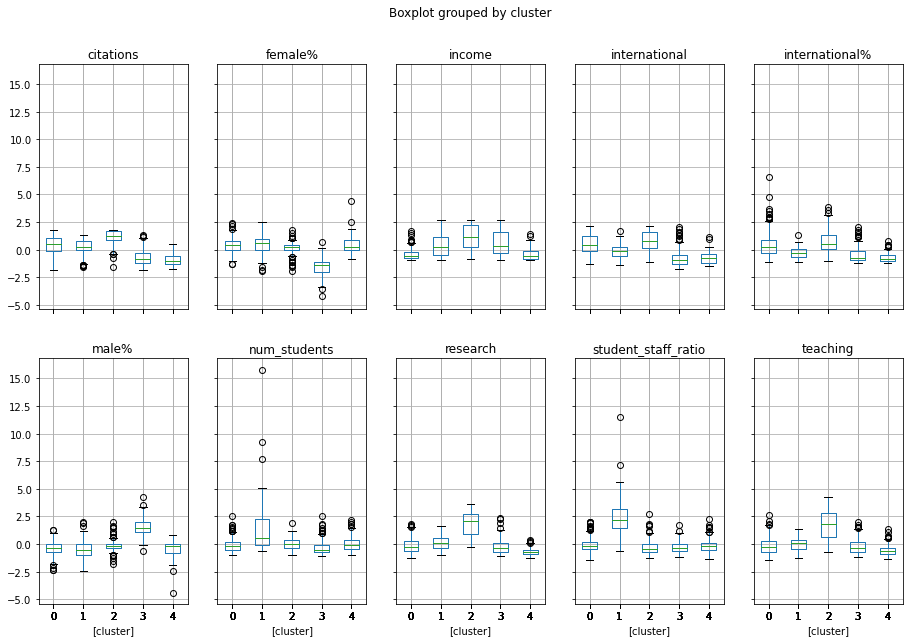

In [ ]:
X_clustered.boxplot(by="cluster", figsize=(15,10), layout=(2,5))

### Hierarchical Clustering (Manual Construction)
We manually construct a binary matrix of schools × countries, scale the data, and apply hierarchical clustering with Ward linkage to visualize relationships using a dendrogram.


####Imports & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import whiten

# Load subset of school-country data
template_data = pd.read_csv("data/school_and_country_table.csv")
template_data = template_data[50:60]   # select rows 50–59
template_data.head()

school_name                   country
50            Vanderbilt University  United States of America
51          University of Minnesota  United States of America
52                 Tufts University  United States of America
53  University of California, Davis  United States of America
54                 Brown University  United States of America
55      University of Massachusetts  United States of America
56                 Kyoto University                     Japan
57              Tsinghua University                     China
58                Boston University  United States of America
59              New York University  United States of America

####Prepare Data (Manual Binary Matrix)

In [ ]:
# Extract unique countries and school names
country_list = list(dict.fromkeys(template_data.country))
school_list = template_data.school_name

# Build lists for DataFrame construction
names, countries, values = [], [], []

# Expand combinations: each school × each country
for school in school_list:
    for country in country_list:
        names.append(school)
        countries.append(country)
        # Assign 1 if school-country pair exists in template_data, else 0
        flag = 0
        for row in template_data.itertuples():
            if school in row and country in row:
                flag = 1
                break
        values.append(flag)

# Construct binary matrix DataFrame
df_matrix = pd.DataFrame({"name": names, "country": countries, "Rank": values})
df_matrix.head()

####Pivot to School × Country Matrix

In [ ]:
vote_rank = df_matrix.pivot(index="name", columns="country", values="Rank")

# Fill missing values with 1 (assume presence if missing)
vote_rank.fillna(1, inplace=True)
vote_rank.head()

####Scale & Linkage

In [ ]:
# Scale data using whitening
df_scaled = whiten(vote_rank.to_numpy())

# Hierarchical clustering with Ward linkage
mergings = linkage(df_scaled, method="ward")

####Dendrogram Visualization

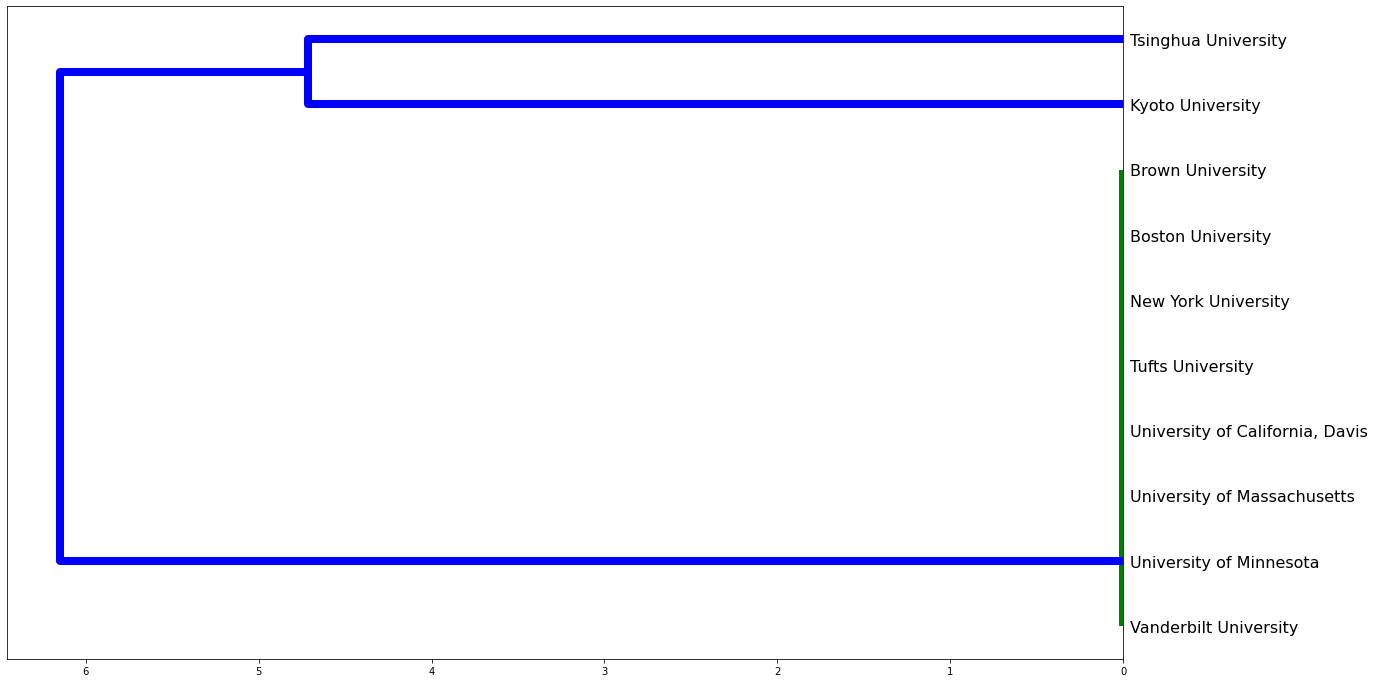

In [ ]:
plt.figure(figsize=(20,12))
dendrogram(
    mergings,
    labels=np.array(vote_rank.index),
    orientation="left",
    leaf_font_size=16
)
plt.title("Hierarchical Clustering Dendrogram (Schools × Countries)")
plt.show()

### 3D Clustering Visualizer
We use Plotly to create an interactive 3D scatter plot of university data, visualizing country, world rank, and institution dimensions.

####Install & Configure Plotly

In [ ]:
# Install specific Plotly version (if needed in Colab)
# %pip install plotly==3.10.0

# Configure Plotly for Jupyter/Colab
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
    '''))

####Imports & Initialization

In [ ]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Initialize Plotly in notebook mode
init_notebook_mode(connected=True)

# Configure browser state
configure_plotly_browser_state()

####Load Data

In [ ]:
data = pd.read_csv("data/cwurData.csv")
data = data[:10]   # select first 10 rows
data.head()

####Create 3D Scatter Plot

In [ ]:
trace = go.Scatter3d(
    x=data["country"],
    y=data["world_rank"],
    z=data["institution"],
    mode="markers",
    marker=dict(
        size=10,
        color="rgb(255,0,0)"   # red markers
    )
)

layout = go.Layout(
    margin=dict(l=0, r=0, b=0, t=0)
)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

##Classification
This block evaluates university data using Pearson correlations, compares multiple classifiers, and demonstrates Random Forest, Decision Tree, and Logistic Regression models with accuracy, confusion matrix, and feature importance insights.

### Pearson Correlation, Model Comparison, Random Forest
We analyze university ranking data by computing Pearson correlations, training multiple classification models, and evaluating Random Forest with accuracy, confusion matrix, ROC curve, and prediction examples.


####Imports

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plotly (optional interactive plots)
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

# Sklearn metrics & models
from sklearn import model_selection
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc,
    classification_report
)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

####Load Data

In [ ]:
df = pd.read_csv("data/cwurData.csv")
df.head(2)

world_rank                            institution  ...   score  year
0           1                     Harvard University  ...  100.00  2012
1           2  Massachusetts Institute of Technology  ...   91.67  2012

[2 rows x 14 columns]

####Missing Values

In [ ]:
df.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

####Fill Missing Values

In [ ]:
df["broad_impact"] = df["broad_impact"].fillna(df.groupby("institution")["broad_impact"].transform("mean"))
df["broad_impact"] = df["broad_impact"].fillna(0)

df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
broad_impact            0
patents                 0
score                   0
year                    0
dtype: int64

####Pearson Correlation

In [ ]:
from scipy.stats import pearsonr

features = [
    "quality_of_education","alumni_employment","quality_of_faculty",
    "publications","influence","citations","broad_impact","patents"
]
target = "score"

for feature in features:
    coeff = pearsonr(df[feature], df[target])[0]
    print(f"Pearson correlation for {feature}: {coeff:.3f}")

Pearson correlation for quality_of_education coeff: -0.6005406287207994
Pearson correlation for alumni_employment coeff: -0.5103735958571963
Pearson correlation for quality_of_faculty coeff: -0.6935399201507382
Pearson correlation for publications coeff: -0.522111322538575
Pearson correlation for influence coeff: -0.5228372990601703
Pearson correlation for citations coeff: -0.5224383145766369
Pearson correlation for broad_impact coeff: -0.5283991771481678
Pearson correlation for patents coeff: -0.4748099206717428


####Add Target Column ("chances")

In [ ]:
df.insert(14, "chances", 0, True)
df.head(1)

world_rank         institution country  ...  score  year  chances
0           1  Harvard University     USA  ...  100.0  2012        0

[1 rows x 15 columns]

In [ ]:
# Binary classification target: score > 50 → 1, else 0
df.loc[df["score"] > 50, "chances"] = 1
df.loc[df["score"] <= 50, "chances"] = 0

# Encode categorical country variable
le = LabelEncoder()
df["country"] = le.fit_transform(df["country"])

####Train/Test Split

In [ ]:
X = df.drop(["score","institution","year","chances","broad_impact"], axis=1)
y = df["chances"].astype(int)

x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=7
)

####Model Comparison

In [ ]:
models = [
    ("LogisticRegression", LogisticRegression()),
    ("GaussianNB", GaussianNB()),
    ("KNN", KNeighborsClassifier()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("LDA", LinearDiscriminantAnalysis()),
    ("QDA", QuadraticDiscriminantAnalysis()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM Linear", SVC(kernel="linear")),
    ("SVM RBF", SVC(kernel="rbf")),
    ("RandomForest", RandomForestClassifier()),
    ("Bagging", BaggingClassifier()),
    ("Calibrated", CalibratedClassifierCV()),
    ("GradientBoosting", GradientBoostingClassifier()),
    ("LinearSVC", LinearSVC()),
    ("Ridge", RidgeClassifier())
]

results = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_result = cross_val_score(model, x_train, y_train, cv=kfold, scoring="accuracy")
    results.append((name, cv_result.mean(), cv_result.std()))

# Sort by mean accuracy
results.sort(key=lambda x: x[1], reverse=True)

for name, mean_acc, std_acc in results:
    print(f"{name:20s} {mean_acc*100:.2f}% (+/- {std_acc*100:.2f}%)")

Random Forest        99.26 (+/-) 0.57 
Bagging              99.20 (+/-) 0.45 
GradientBoosting     99.15 (+/-) 0.52 
DecisionTree         99.03 (+/-) 0.84 
AdaBoost             99.03 (+/-) 0.51 
KNN                  96.48 (+/-) 1.19 
LR                   95.40 (+/-) 1.38 
SVM Linear           95.40 (+/-) 1.40 
Calibrated           94.66 (+/-) 1.30 
SVM RBF              93.58 (+/-) 1.50 
QDA                  93.30 (+/-) 1.83 
LinearSVC            92.44 (+/-) 2.32 
GNB                  92.22 (+/-) 1.65 
LDA                  90.17 (+/-) 1.05 
Ridge                89.89 (+/-) 1.24 


####Random Forest Example

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       376
           1       0.91      0.98      0.95        64

    accuracy                           0.98       440
   macro avg       0.96      0.98      0.97       440
weighted avg       0.99      0.98      0.98       440

98.4090909090909 %


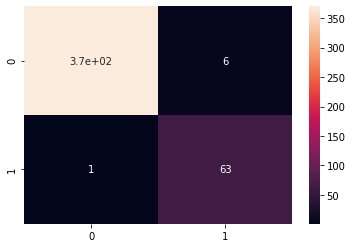

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print(classification_report(y_test, rf_pred))
accuracy = rf_model.score(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Random Forest")
plt.show()

####ROC Curve

Text(0.5, 0, 'False Positive Rate')

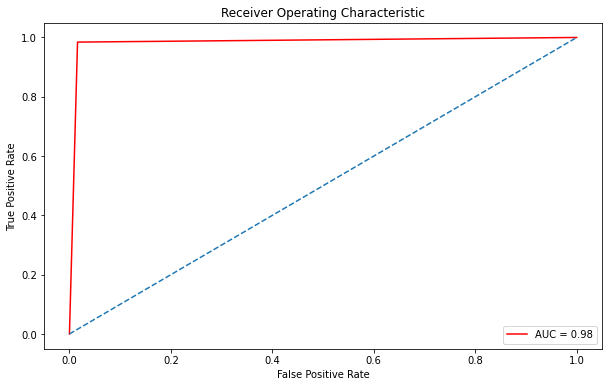

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.title("Receiver Operating Characteristic — Random Forest")
plt.plot(fpr, tpr, color="red", label=f"AUC = {roc_auc:.2f}")
plt.legend(loc="lower right")
plt.plot([0,1],[0,1], linestyle="--")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

####Train vs Test Accuracy

In [ ]:
train_score = rf_model.score(x_train, y_train)
test_score = rf_model.score(x_test, y_test)

print(f"Training Accuracy: {train_score:.3f}")
print(f"Test Accuracy: {test_score:.3f}")

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 0.9840909090909091


####Prediction Example

In [ ]:
prediction = rf_model.predict(x_train.iloc[15].values.reshape(1,-1))
actual_value = y_train.iloc[15]

print(f"Predicted Value: {prediction[0]}")
print(f"Actual Value:    {actual_value}")

Predicted Value 	: 1
Actual Value		: 1


### Decision Tree & Logistic Regression
We predict publication bands (Low/Medium/High) using university performance indicators, comparing Decision Tree and Logistic Regression models with accuracy scores, feature importance, and summary interpretation.


####Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn preprocessing & split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Classification algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score

# Custom visualization & summary functions
from functionsclassifier import *

####Load Data

In [ ]:
dataset = pd.read_csv("data/shanghaiData.csv")
dataset.head()

world_rank                              university_name  ...   pcp  year
0          1                           Harvard University  ...  72.4  2005
1          2                      University of Cambridge  ...  66.9  2005
2          3                          Stanford University  ...  65.0  2005
3          4           University of California, Berkeley  ...  52.7  2005
4          5  Massachusetts Institute of Technology (MIT)  ...  53.0  2005

[5 rows x 11 columns]

####Inspect Data

In [ ]:
# Inspect data shape
dataset.shape

(4897, 11)

In [ ]:
# Inspect descriptive stats
dataset.describe()

total_score       alumni  ...          pcp         year
count  1101.000000  4896.000000  ...  4895.000000  4897.000000
mean     36.383470     9.161724  ...    21.242329  2009.658566
std      13.557186    14.140636  ...     9.254351     3.197576
min      23.500000     0.000000  ...     8.300000  2005.000000
25%      27.400000     0.000000  ...    15.600000  2007.000000
50%      31.300000     0.000000  ...    19.000000  2009.000000
75%      41.800000    15.600000  ...    24.500000  2012.000000
max     100.000000   100.000000  ...   100.000000  2015.000000

[8 rows x 8 columns]

In [ ]:
#find object type data
dataset.dtypes

world_rank          object
university_name     object
national_rank       object
total_score        float64
alumni             float64
award              float64
hici               float64
ns                 float64
pub                float64
pcp                float64
year                 int64
dtype: object

####Missing Values

In [ ]:
# Percentage of missing values per column
dataset.isnull().mean().sort_values()

world_rank         0.000000
year               0.000000
university_name    0.000204
national_rank      0.000204
alumni             0.000204
award              0.000408
hici               0.000408
pub                0.000408
pcp                0.000408
ns                 0.004493
total_score        0.775168
dtype: float64

####Impute Missing Values

In [ ]:
# Replace missing values with column means
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

# Drop non-numeric identifiers
dataset = dataset.drop(["university_name","national_rank","world_rank","year"], axis=1)

# Check if any missing values remain
dataset.isnull().values.any()

False

In [ ]:
dataset.shape

(4897, 7)

In [ ]:
dataset.describe()

total_score       alumni  ...          pub          pcp
count  4897.000000  4897.000000  ...  4897.000000  4897.000000
mean     36.383470     9.161724  ...    38.254648    21.242329
std       6.426066    14.139192  ...    13.048143     9.252461
min      23.500000     0.000000  ...     7.300000     8.300000
25%      36.383470     0.000000  ...    28.900000    15.600000
50%      36.383470     0.000000  ...    36.000000    19.000000
75%      36.383470    15.600000  ...    45.300000    24.500000
max     100.000000   100.000000  ...   100.000000   100.000000

[8 rows x 7 columns]

####Correlation & Boxplots

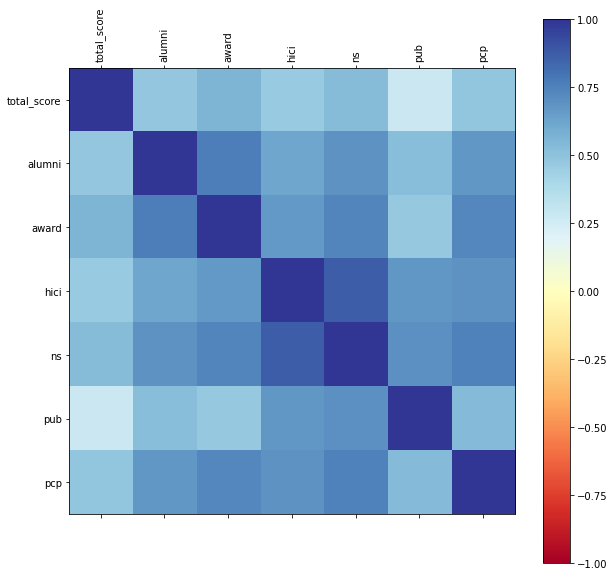

In [ ]:
correlationMatrix(dataset)

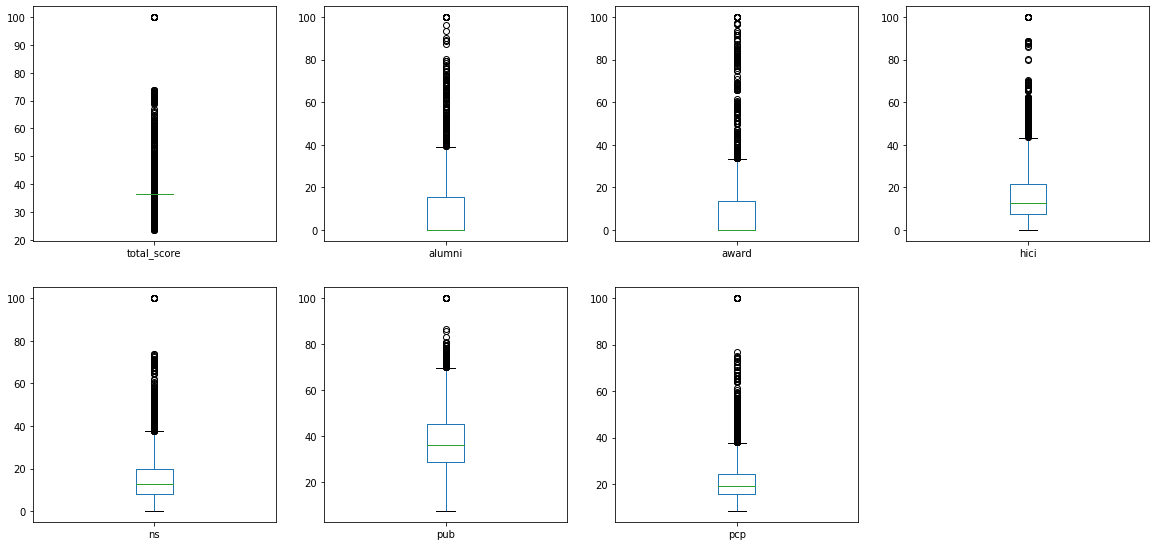

In [ ]:
boxPlotAll(dataset)

####Target Variable: Publication Bands

In [ ]:
# Create categorical target variable (L/M/H bands for publications)
dataset = appendEqualCountsClass(dataset, "pub_band", "pub", 3, ["L","M","H"])
dataset.pub_band.value_counts()
dataset[["pub","pub_band"]].head()

pub pub_band
0  100.0        H
1   70.9        H
2   72.3        H
3   72.2        H
4   64.3        H

####Features & Normalization

In [ ]:
y = dataset["pub_band"]
X = dataset[["total_score","alumni","award","hici","ns","pcp"]]

# Normalize features
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X.describe()

total_score       alumni  ...           ns          pcp
count  4897.000000  4897.000000  ...  4897.000000  4897.000000
mean      0.168411     0.091617  ...     0.160785     0.141138
std       0.084001     0.141392  ...     0.124834     0.100899
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.168411     0.000000  ...     0.080000     0.079607
50%       0.168411     0.000000  ...     0.129000     0.116685
75%       0.168411     0.156000  ...     0.198000     0.176663
max       1.000000     1.000000  ...     1.000000     1.000000

[8 rows x 6 columns]

####Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

####Train Models

In [ ]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Logistic Regression
model_lr = LogisticRegression(solver="lbfgs", multi_class="auto")
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####Training Accuracy

In [ ]:
pred_dt_train = model_dt.predict(X_train)
print("DecisionTreeClassifier (Train):", accuracy_score(y_train, pred_dt_train))

DecisionTreeClassifier 1.0


In [ ]:
pred_lr_train = model_lr.predict(X_train)
print("LogisticRegression (Train):", accuracy_score(y_train, pred_lr_train))

LogisticRegression 0.5926829268292683


####Test Accuracy

In [ ]:
pred_dt_test = model_dt.predict(X_test)
print("DecisionTreeClassifier (Test):", accuracy_score(y_test, pred_dt_test))

DecisionTreeClassifier 0.6784168212739641


In [ ]:
pred_lr_test = model_lr.predict(X_test)
print("LogisticRegression (Test):", accuracy_score(y_test, pred_lr_test))

LogisticRegression 0.6091527520098948


####Decision Tree Visualization & Summary

In [ ]:
viewDecisionTree(model_dt, X.columns)

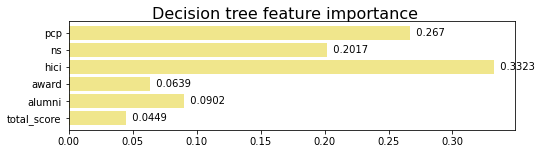

In [ ]:
decisionTreeSummary(model_dt, X.columns)
# Shows feature importance in building the decision tree.

####Logistic Regression Summary

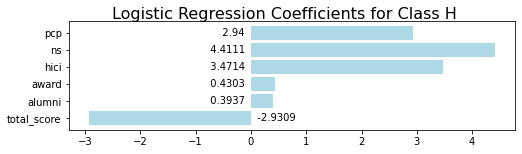

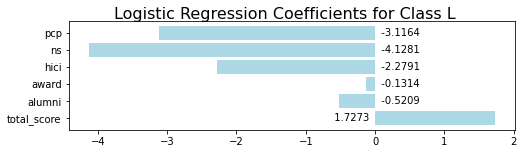

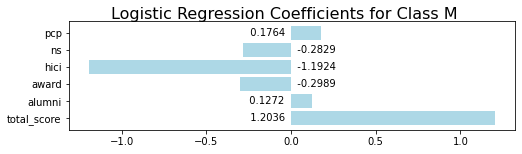

In [ ]:
logisticRegressionSummary(model_lr, X.columns)

# Interpretation:
# - High ns, hici, pcp → strong indicators of high publication band.
# - Low ns → strong indicator of low publication band.
# - Low hici → strong indicator of medium publication band.

## Regression
This block applies Linear, KNN, SVR, Poisson, and Negative Binomial regression models to university data, comparing predictive accuracy and interpreting results across classical approaches.


### Linear Regression
We apply linear regression to university ranking data, predicting world rank from performance indicators after preprocessing, encoding, and scaling.


####Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

####Load Data

In [ ]:
# Load dataset
data = pd.read_csv("data/cwurData.csv")
data.head()

world_rank                            institution  ...   score  year
0           1                     Harvard University  ...  100.00  2012
1           2  Massachusetts Institute of Technology  ...   91.67  2012
2           3                    Stanford University  ...   89.50  2012
3           4                University of Cambridge  ...   86.17  2012
4           5     California Institute of Technology  ...   85.21  2012

[5 rows x 14 columns]

####Drop Non‑Numeric Identifiers

In [ ]:
# Remove institution name
data.drop("institution", axis=1, inplace=True)

# Remove year column
data.drop("year", axis=1, inplace=True)
data.head()

world_rank         country  national_rank  ...  patents   score  year
0           1             USA              1  ...        5  100.00  2012
1           2             USA              2  ...        1   91.67  2012
2           3             USA              3  ...       15   89.50  2012
3           4  United Kingdom              1  ...       50   86.17  2012
4           5             USA              4  ...       18   85.21  2012

[5 rows x 13 columns]

####Handle Missing Values

In [ ]:
# Drop column with missing values (broad_impact)
data.drop("broad_impact", axis=1, inplace=True)
data.head()

world_rank         country  national_rank  ...  broad_impact  patents   score
0           1             USA              1  ...           NaN        5  100.00
1           2             USA              2  ...           NaN        1   91.67
2           3             USA              3  ...           NaN       15   89.50
3           4  United Kingdom              1  ...           NaN       50   86.17
4           5             USA              4  ...           NaN       18   85.21

[5 rows x 12 columns]

In [ ]:
# Check number of missing values
np.sum(data.isnull())

world_rank                0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
dtype: int64

####Encode Categorical Variable

In [ ]:
data.drop('broad_impact', axis=1, inplace=True)
data.head()

world_rank         country  national_rank  ...  citations  patents   score
0           1             USA              1  ...          1        5  100.00
1           2             USA              2  ...          4        1   91.67
2           3             USA              3  ...          2       15   89.50
3           4  United Kingdom              1  ...         11       50   86.17
4           5             USA              4  ...         22       18   85.21

[5 rows x 11 columns]

In [ ]:
encoder = LabelEncoder()
data["country"] = encoder.fit_transform(data["country"])

# Mapping dictionary (index → country name)
country_mappings = {index: label for index, label in enumerate(encoder.classes_)}
data.head()

world_rank  country  national_rank  ...  citations  patents   score
0           1       54              1  ...          1        5  100.00
1           2       54              2  ...          4        1   91.67
2           3       54              3  ...          2       15   89.50
3           4       57              1  ...         11       50   86.17
4           5       54              4  ...         22       18   85.21

[5 rows x 11 columns]

####Define Features & Target

In [ ]:
y = data["world_rank"]   # target variable
X = data.drop("world_rank", axis=1)   # predictors

# Standardize features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

country  national_rank  quality_of_education  ...  citations   patents     score
0  1.035555      -0.759305             -2.199214  ...  -1.560375 -1.563683  6.727841
1  1.035555      -0.739974             -2.182808  ...  -1.549025 -1.578285  5.654255
2  1.035555      -0.720642             -2.117185  ...  -1.556592 -1.527178  5.374581
3  1.191751      -0.759305             -2.174605  ...  -1.522540 -1.399410  4.945405
4  1.035555      -0.701311             -2.240229  ...  -1.480922 -1.516227  4.821678

[5 rows x 10 columns]

####Train/Test Split & Model Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

####Model Evaluation

In [ ]:
print(f"Model R^2: {model.score(X_test, y_test):.3f}")

Model R^2: 0.908609142961088


####Residual Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


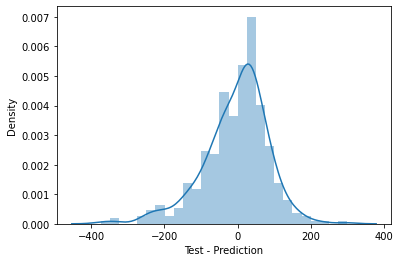

In [ ]:
predictions = model.predict(X_test)

sns.histplot(y_test - predictions, kde=True)
plt.xlabel("Residuals (Test - Prediction)")
plt.title("Residual Distribution — Linear Regression")
plt.show()

### Compare: Linear Regression, KNN, SVR
We compare three regression algorithms (Linear Regression, K‑Nearest Neighbors, Support Vector Regression) on university performance data, evaluating mean absolute error and exploring KNN neighbors.


####Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn preprocessing & split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Evaluation metric
from sklearn.metrics import mean_absolute_error

# Custom visualization functions
from functions import *

####Load & Clean Data

In [ ]:
dataset = pd.read_csv("data/shanghaiData.csv")

# Drop non-numeric identifiers
dataset = dataset.drop(["university_name","national_rank","world_rank","year"], axis=1)

# Impute missing values with column means
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

dataset.head()

total_score  alumni  award   hici     ns    pub   pcp
0        100.0   100.0  100.0  100.0  100.0  100.0  72.4
1         73.6    99.8   93.4   53.3   56.6   70.9  66.9
2         73.4    41.1   72.2   88.5   70.9   72.3  65.0
3         72.8    71.8   76.0   69.4   73.9   72.2  52.7
4         70.1    74.0   80.6   66.7   65.8   64.3  53.0

####Visualization

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


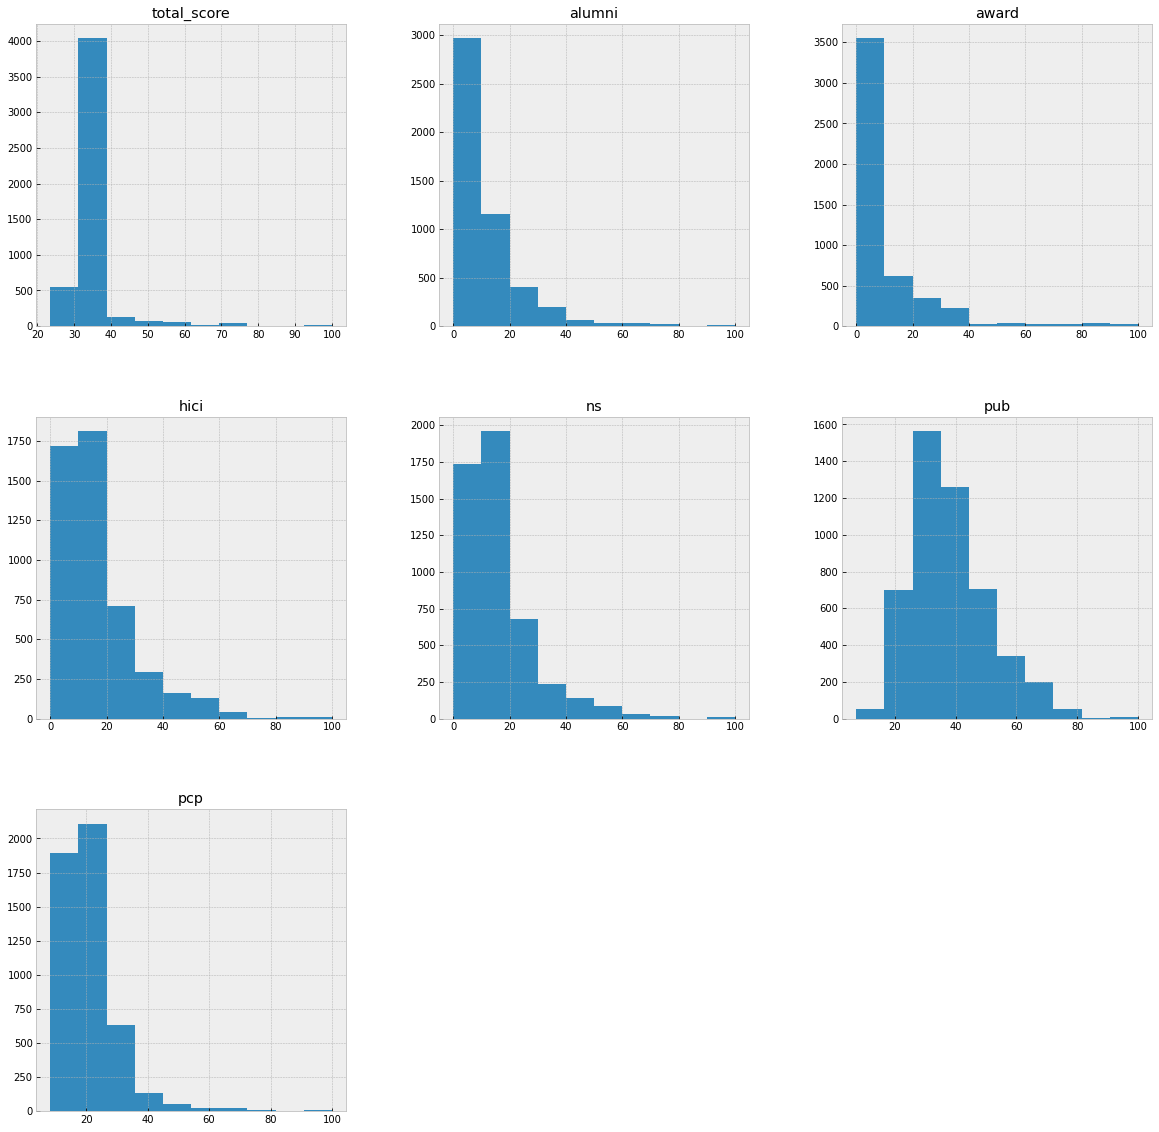

In [ ]:
plt.style.use("bmh")
dataset.hist(figsize=(20,20))
plt.show()

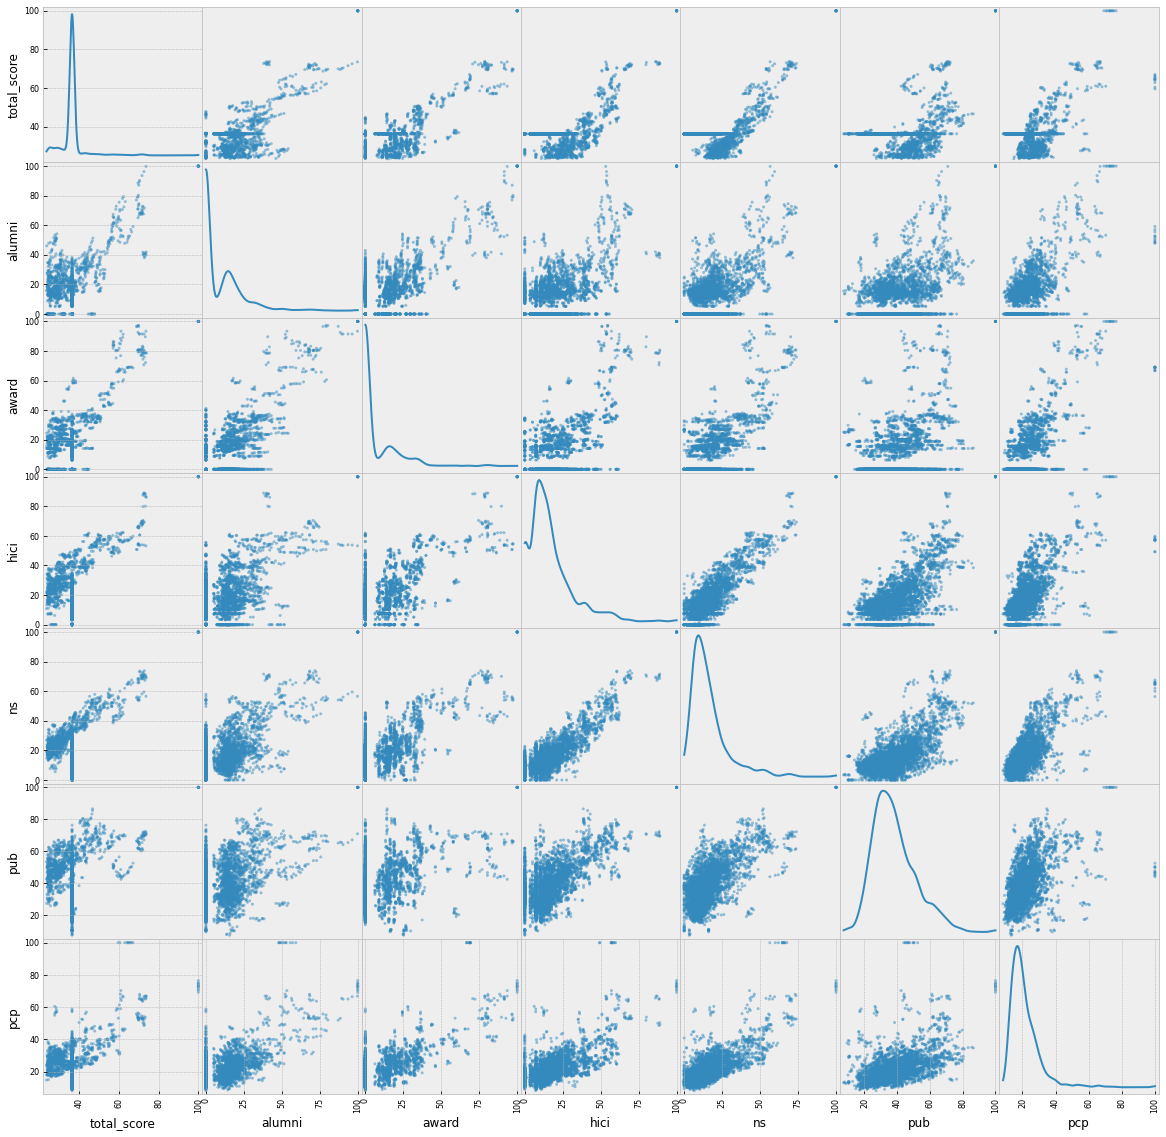

In [ ]:
scatterMatrix(dataset)

####Features & Target

In [ ]:
y = dataset["total_score"]
X = dataset[["alumni","award","hici","ns","pub","pcp"]]

# Normalize features
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

####Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

####Model Training & Evaluation (Train Data)

In [ ]:
models = [LinearRegression(), KNeighborsRegressor(), SVR()]

for model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)
    print(f"{type(model).__name__} (Train MAE): {mae:.3f}")

LinearRegression 3.280544766882713
KNeighborsRegressor 0.2447019062493076
SVR 0.9801076116691725


####Model Evaluation (Test Data)

In [ ]:
for model in models:
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print(f"{type(model).__name__} (Test MAE): {mae:.3f}")

LinearRegression 3.442240825183241
KNeighborsRegressor 0.40135519685539117
SVR 1.0242327072260973


####KNN Detailed Analysis

In [ ]:
# Select KNN as best-performing model
knn_model = models[1]
predictions = knn_model.predict(X_test)

df_results = X_test.copy()
df_results["Prediction"] = predictions
df_results["Actual"] = y_test
df_results["Error"] = y_test - predictions
df_results.head()

alumni  award   hici     ns  ...       pcp  Prediction    Actual  Error
1495   0.000  0.000  0.074  0.083  ...  0.034896    36.38347  36.38347   0.00
2132   0.145  0.000  0.218  0.238  ...  0.241003    36.38347  36.38347   0.00
3162   0.000  0.000  0.250  0.156  ...  0.214831    36.38347  36.38347   0.00
645    0.000  0.200  0.133  0.108  ...  0.138495    36.38347  36.38347   0.00
2313   0.000  0.000  0.073  0.096  ...  0.097056    36.38347  36.38347   0.00
...      ...    ...    ...    ...  ...       ...         ...       ...    ...
4248   0.000  0.000  0.133  0.071  ...  0.042530    36.38347  36.38347   0.00
4377   0.000  0.000  0.036  0.092  ...  0.106870    36.38347  36.38347   0.00
1678   0.137  0.000  0.163  0.123  ...  0.119956    36.38347  36.38347   0.00
1131   0.000  0.000  0.267  0.290  ...  0.145038    36.38347  36.38347   0.00
3518   0.803  0.972  0.546  0.550  ...  0.477644    70.02000  69.80000  -0.22

[1617 rows x 9 columns]

####KNN Distances

In [ ]:
# Distances for each data point
knn_model.kneighbors(X)

(array([[0.        , 0.00109051, 0.00654308, 0.01308615, 0.01417666],
        [0.09173601, 0.19796995, 0.21978058, 0.26511665, 0.37069387],
        [0.        , 0.0246569 , 0.07466426, 0.07478856, 0.08456085],
        ...,
        [0.01705213, 0.0423892 , 0.04453164, 0.04655352, 0.04996471],
        [0.01995348, 0.02430593, 0.03091061, 0.0309688 , 0.03102479],
        [0.02439091, 0.02441003, 0.02453934, 0.02602789, 0.02782374]]),
 array([[1778,  112,  947, 2208,   98],
        [2549, 3167, 1542,  764,  142],
        [2327, 2451, 1258, 2016, 2230],
        ...,
        [2656, 2783, 2792, 1844, 2520],
        [ 517,   25, 1269, 2488, 2275],
        [1819, 1945, 3137, 3253, 2606]]))

####KNN Neighbors Graph

In [ ]:
# Neighbors adjacency matrix
neighbors_graph = knn_model.kneighbors_graph(X).toarray()

# Inspect neighbors of the first data point
neighbors_graph[0]

array([0., 0., 0., ..., 0., 0., 0.])

### Poisson Regression
We apply Poisson regression to university performance data, predicting total scores from institutional indicators, and evaluate model fit with R² and prediction frequency analysis.


####Imports

In [ ]:
# Install specific scikit-learn version if needed
# %pip install scikit-learn==0.23.2

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import PoissonRegressor
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split

####Load Data

In [ ]:
shanghai = pd.read_csv("data/shanghaiData.csv")
shanghai.head()

world_rank                              university_name  ...   pcp  year
0          1                           Harvard University  ...  72.4  2005
1          2                      University of Cambridge  ...  66.9  2005
2          3                          Stanford University  ...  65.0  2005
3          4           University of California, Berkeley  ...  52.7  2005
4          5  Massachusetts Institute of Technology (MIT)  ...  53.0  2005

[5 rows x 11 columns]

####Clean Data

In [ ]:
# Drop non-numeric identifiers
df = shanghai.drop(["world_rank","university_name","national_rank","year"], axis=1)

# Drop rows with missing values
df.dropna(inplace=True)

# Check for remaining nulls
df.isnull().values.any()

False

In [ ]:
df.head()

total_score  alumni  award   hici     ns    pub   pcp
0        100.0   100.0  100.0  100.0  100.0  100.0  72.4
1         73.6    99.8   93.4   53.3   56.6   70.9  66.9
2         73.4    41.1   72.2   88.5   70.9   72.3  65.0
3         72.8    71.8   76.0   69.4   73.9   72.2  52.7
4         70.1    74.0   80.6   66.7   65.8   64.3  53.0

In [ ]:
df.shape

(1101, 7)

####Train/Test Split

In [ ]:
X = df.drop("total_score", axis=1)
y = df["total_score"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

####Fit Poisson Regression Model

In [ ]:
pipeline = Pipeline([("model", PoissonRegressor())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2_test = metrics.r2_score(y_test, y_pred)
print(f"Test R²: {r2_test:.3f}")

0.9507003124997112

####Training Accuracy

In [ ]:
y_pred_train = pipeline.predict(X_train)
r2_train = metrics.r2_score(y_train, y_pred_train)
print(f"Train R²: {r2_train:.3f}")

0.9328038430431371

####Example Prediction

In [ ]:
new_X = [[71.8, 76.0, 69.4, 73.9, 72.2, 52.7]]
print("Example Prediction:", pipeline.predict(new_X))

[72.44528819]


####Evaluation Table

In [ ]:
eval_df = pd.DataFrame({
    "y_pred": [round(y, 0) for y in y_pred],
    "y": y_test
}).reset_index()

eval_df.head()

index  y_pred     y
0   3523    51.0  56.1
1   2540    38.0  41.8
2   3535    40.0  43.4
3   4440    32.0  32.3
4   3573    30.0  29.7

####Frequency Table

In [ ]:
print("Frequency table")
eval_df.groupby(["y","y_pred"]).agg("count").reset_index() \
       .pivot(index="y", columns="y_pred", values="index") \
       .fillna(0)

     Frequency table


y_pred  26.0   27.0   28.0   29.0   30.0   ...  69.0   72.0   75.0   77.0   125.0
y                                          ...                                   
23.9      1.0    3.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
24.0      0.0    2.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
24.1      0.0    2.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
24.2      0.0    1.0    1.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
24.3      1.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
...       ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
71.6      0.0    0.0    0.0    0.0    0.0  ...    1.0    0.0    0.0    0.0    0.0
72.1      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0
72.6      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    1.0    0.0
72.8      0.0    0.0    0.0    0.0    0.0  ...    0.0    1.0    0.0    1.0    0.0
100.0     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    1.0

[146 rows x 37 columns]

### Negative Binomial Regression
We apply Negative Binomial regression to university performance data, first with a static dispersion parameter (α=1), then by estimating α via Poisson regression and auxiliary OLS, and evaluate predictions against actual scores.


####Imports & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("data/shanghaiData.csv")
df.dropna(inplace=True)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


world_rank                              university_name  ...   pcp  year
0          1                           Harvard University  ...  72.4  2005
1          2                      University of Cambridge  ...  66.9  2005
2          3                          Stanford University  ...  65.0  2005
3          4           University of California, Berkeley  ...  52.7  2005
4          5  Massachusetts Institute of Technology (MIT)  ...  53.0  2005

[5 rows x 11 columns]

####Quantile & Data Filtering

In [ ]:
# 95th percentile of total_score
df["total_score"].quantile(0.95)

67.1

In [ ]:
# Restrict to scores < 68
df = df[df["total_score"] < 68]

# Train/test split mask
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]

In [ ]:
df_train.shape

(820, 11)

In [ ]:
df_test.shape

(226, 11)

####Define Variables & Fit Static α Model

In [ ]:
expr = "total_score ~ alumni + award + hici + ns + pub + pcp + C(year)"

y_train, X_train = dmatrices(expr, df_train, return_type="dataframe")
y_test, X_test = dmatrices(expr, df_test, return_type="dataframe")

# Negative Binomial with static alpha=1
nb_model_static = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=1)).fit()
print(nb_model_static.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_score   No. Observations:                  820
Model:                            GLM   Df Residuals:                      803
Model Family:        NegativeBinomial   Df Model:                           16
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3696.1
Date:                Sun, 13 Dec 2020   Deviance:                      0.75945
Time:                        11:37:19   Pearson chi2:                    0.752
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.5922      0.238     

####Predictions & Accuracy (Static α)

In [ ]:
nb_pred_train = nb_model_static.get_prediction(X_train).summary_frame()
predicted_train = nb_pred_train["mean"]

print("Train R²:", round(r2_score(y_train, predicted_train)*100, 2), "%")

R-square of train set:  98.34 %


In [ ]:
nb_pred_test = nb_model_static.get_prediction(X_test).summary_frame()
predicted_test = nb_pred_test["mean"]

print("Test R²:", round(r2_score(y_test, predicted_test)*100, 2), "%")

R-square of train set:  98.16 %


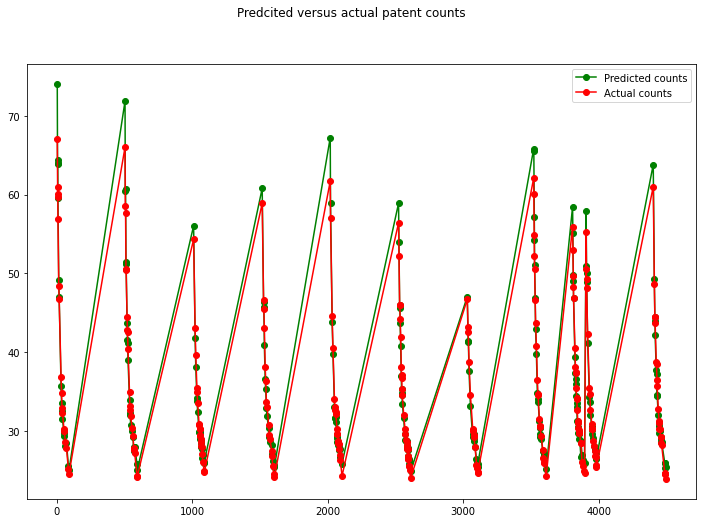

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Predicted vs Actual Counts (Static α)")
plt.plot(X_test.index, predicted_test, "go-", label="Predicted")
plt.plot(X_test.index, y_test, "ro-", label="Actual")
plt.legend()
plt.show()

####Estimate α via Poisson Regression

In [ ]:
final_dataset = pd.read_csv("data/shanghaiData.csv")
final_dataset.dropna(inplace=True)

mask = np.random.rand(len(final_dataset)) < 0.8
train_set = final_dataset[mask]
test_set = final_dataset[~mask]

expr = "total_score ~ alumni + award + hici + ns + pub + pcp"

y_train, X_train = dmatrices(expr, train_set, return_type="dataframe")
y_test, X_test = dmatrices(expr, test_set, return_type="dataframe")

# Fit Poisson regression
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_score   No. Observations:                  866
Model:                            GLM   Df Residuals:                      859
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2414.7
Date:                Sun, 13 Dec 2020   Deviance:                       163.22
Time:                        11:43:12   Pearson chi2:                     159.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8037      0.032     88.101      0.0

####Auxiliary OLS to Estimate α

In [ ]:
# λ vector from Poisson
train_set["lambda"] = poisson_model.mu

# Auxiliary dependent variable
train_set["aux_dep"] = train_set.apply(
    lambda x: ((x["total_score"] - x["lambda"])**2 - x["total_score"]) / x["lambda"], axis=1
)

# Auxiliary OLS regression
aux_ols = smf.ols("aux_dep ~ lambda - 1", train_set).fit()
alpha_est = aux_ols.params[0]
print("Estimated α:", alpha_est)

total_score_LAMBDA    0.217673
dtype: float64


####Fit NB2 Model with Estimated α

In [ ]:
nb2_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha_est)).fit()
print(nb2_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_score   No. Observations:                  866
Model:                            GLM   Df Residuals:                      859
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3283.7
Date:                Sun, 13 Dec 2020   Deviance:                       12.059
Time:                        11:47:02   Pearson chi2:                     11.1
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7123      0.097     27.829      0.0

####Predictions & Visualization (Estimated α)

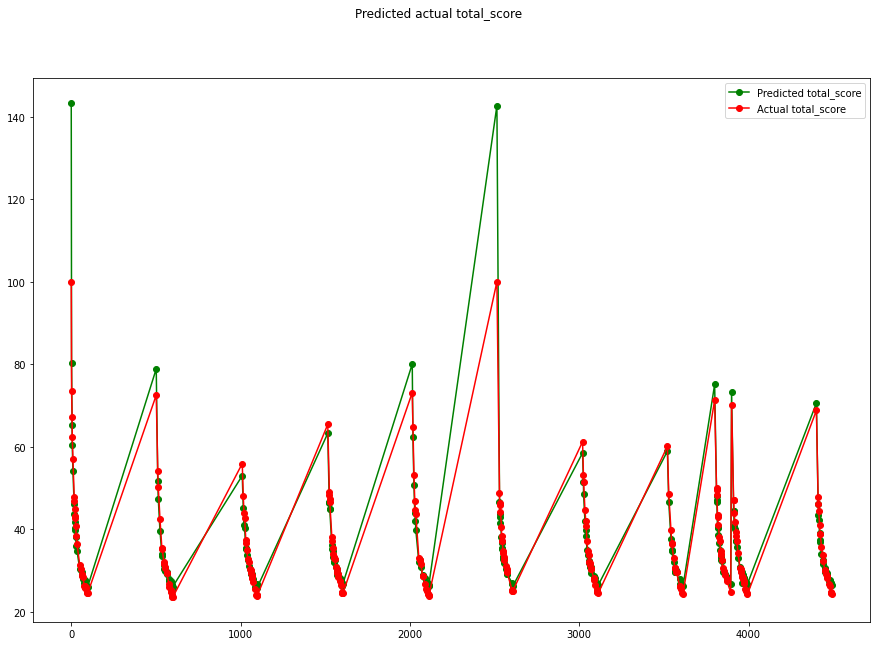

In [ ]:
nb2_pred = nb2_model.get_prediction(X_test).summary_frame()
predicted_counts = nb2_pred["mean"]
actual_counts = y_test["total_score"]

plt.figure(figsize=(15,10))
plt.title("Predicted vs Actual Total Score (Estimated α)")
plt.plot(X_test.index, predicted_counts, "go-", label="Predicted")
plt.plot(X_test.index, actual_counts, "ro-", label="Actual")
plt.legend()
plt.show()

# Neural Network Approaches Overview
The Neural Network block demonstrates modern machine learning methods inspired by biological neural systems, applied to university performance data.

- It begins with **unsupervised clustering using Self‑Organizing Maps (SOM)**, implemented through SimpSOM and MiniSom, where universities are projected onto a 2D grid, grouped into clusters, and visualized with U‑matrices and cluster plots.

- Next, it explores **classification with MLPClassifier**, a multi‑layer perceptron trained to categorize institutions into high, medium, and low performance levels, evaluated with confusion matrices and accuracy metrics.

- Finally, it applies **regression with MLPRegressor**, predicting total scores from institutional indicators and assessing model fit with R² scores.

Together, these sections highlight how neural network approaches extend classical methods by capturing nonlinear relationships, enabling richer clustering, classification, and regression analyses.


## Clustering — Self‑Organizing Maps (SOM/miniSOM)
We apply self‑organizing maps (SOM) to university performance data using SimpSOM and MiniSom, visualize the trained maps, and cluster universities into groups with unsupervised learning.


###Imports & Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Load dataset
original_data = pd.read_csv("data/times.csv", index_col="university_name")

# Select relevant features
X = original_data[[
    "teaching","international","research","citations","income","total_score",
    "num_students","student_staff_ratio","international%","female%","male%"
]]

# Fill missing values with column means
X = X.fillna(X.mean())

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

array([[ 4.27456366,  0.65465542,  3.55897378, ...,  1.34850955,
        -1.44235777,  1.44235777],
       [ 3.66692605,  1.93865583,  3.62557194, ...,  2.008736  ,
        -0.30856882,  0.30856882],
       [ 4.06756624,  1.17416874,  3.48725268, ...,  0.87691922,
        -0.65742695,  0.65742695],
       ...,
       [-0.50640919, -1.36848995, -0.91847191, ..., -0.91512401,
         0.        ,  0.        ],
       [-0.76682531, -1.0643846 , -0.62134164, ..., -0.44353369,
        -1.87843044,  1.87843044],
       [-1.02724143, -1.30091099, -0.50351413, ..., -0.82080595,
        -0.57021242,  0.57021242]])

###Train SOM with SimpSOM

In [ ]:
# %pip install SimpSOM

import SimpSOM as sps

# Train SOM (20x20 grid, periodic boundary conditions, 20,000 epochs, learning rate 0.01)
net = sps.somNet(20, 20, X_scaled, PBC=True)
net.train(0.01, 20000)

# Save weights
net.save("filename_weights")

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


###SOM Visualization

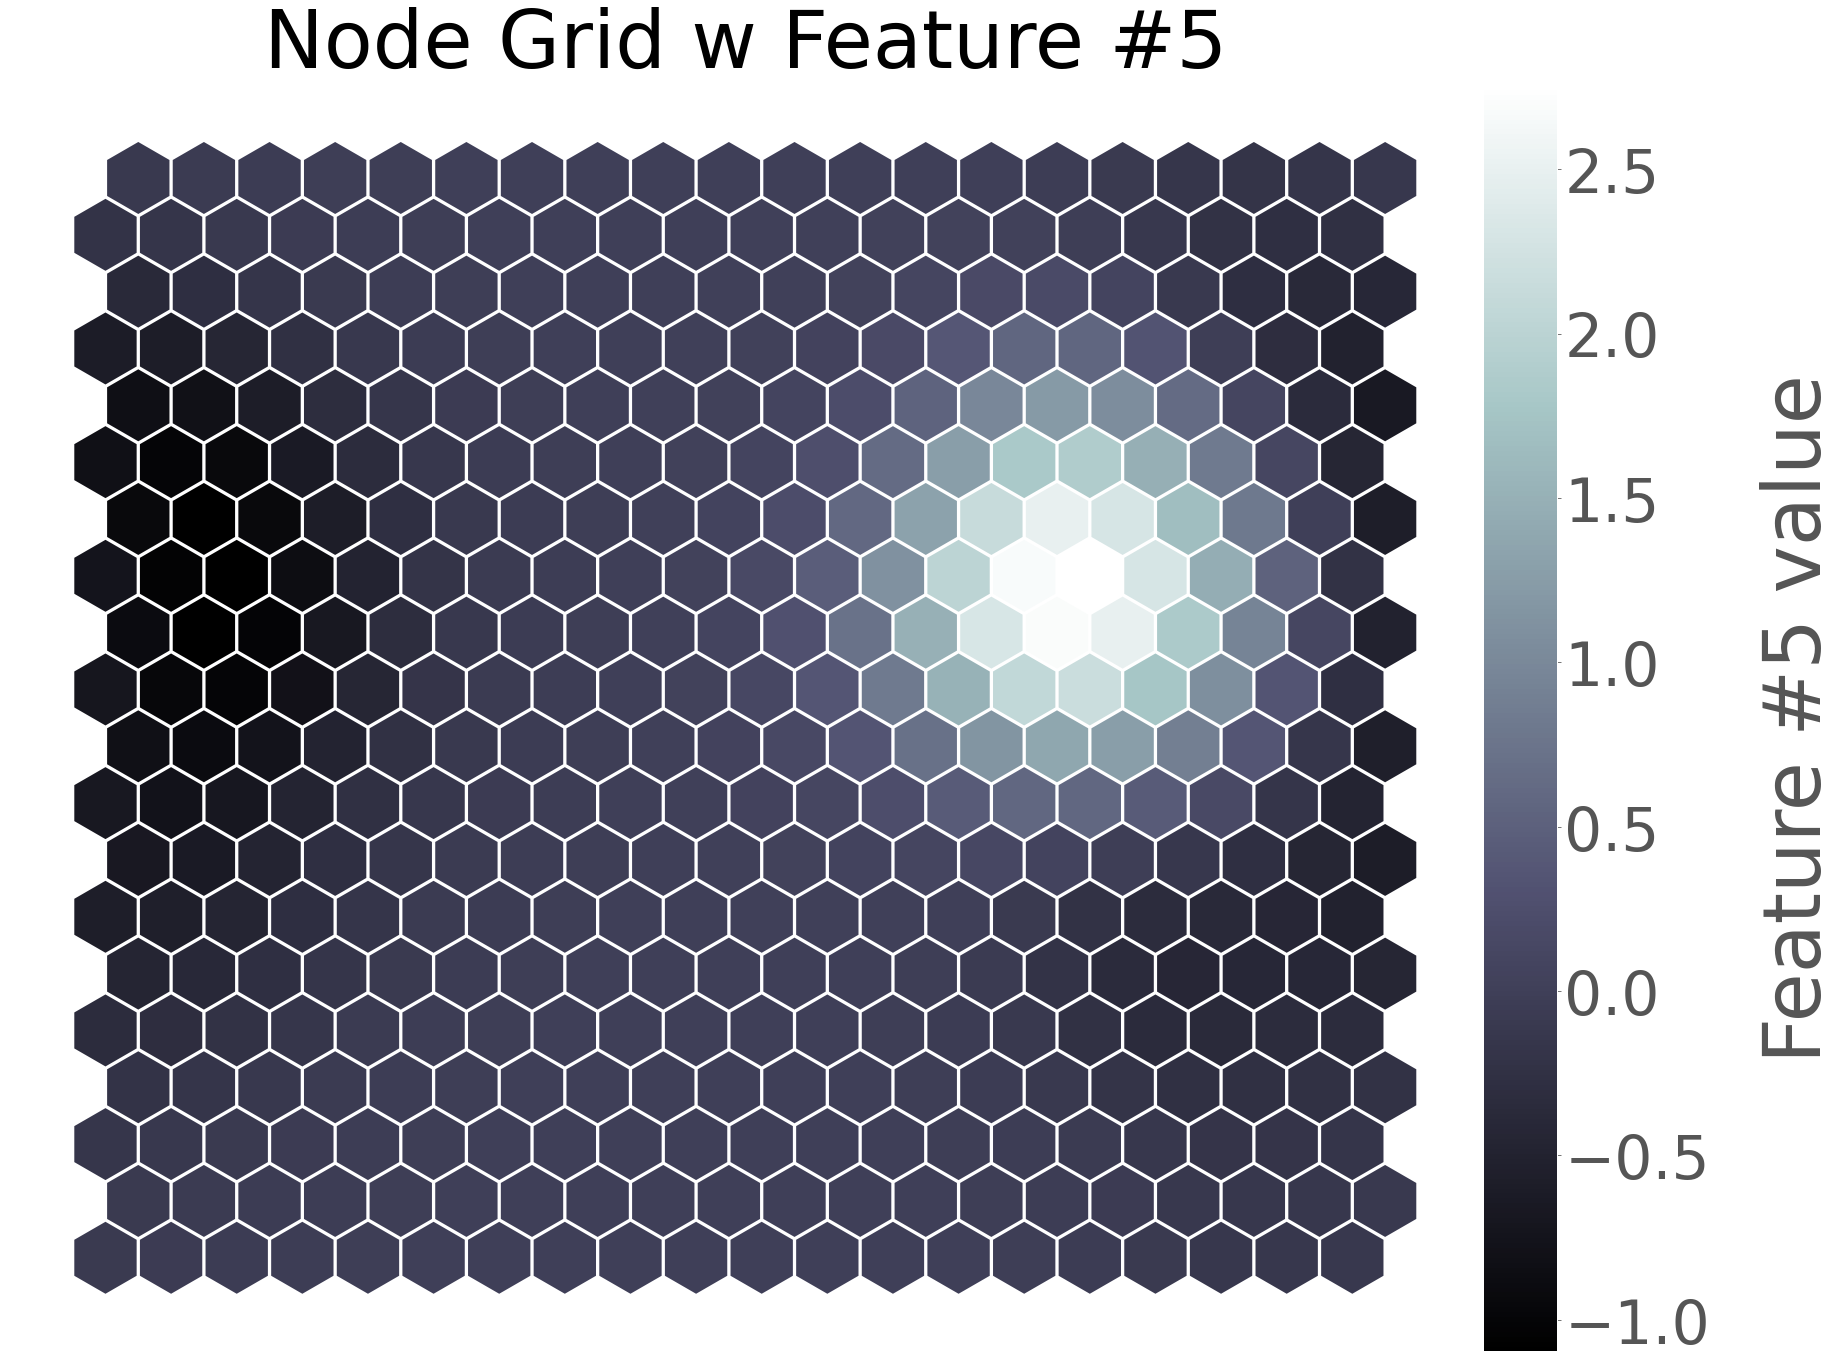

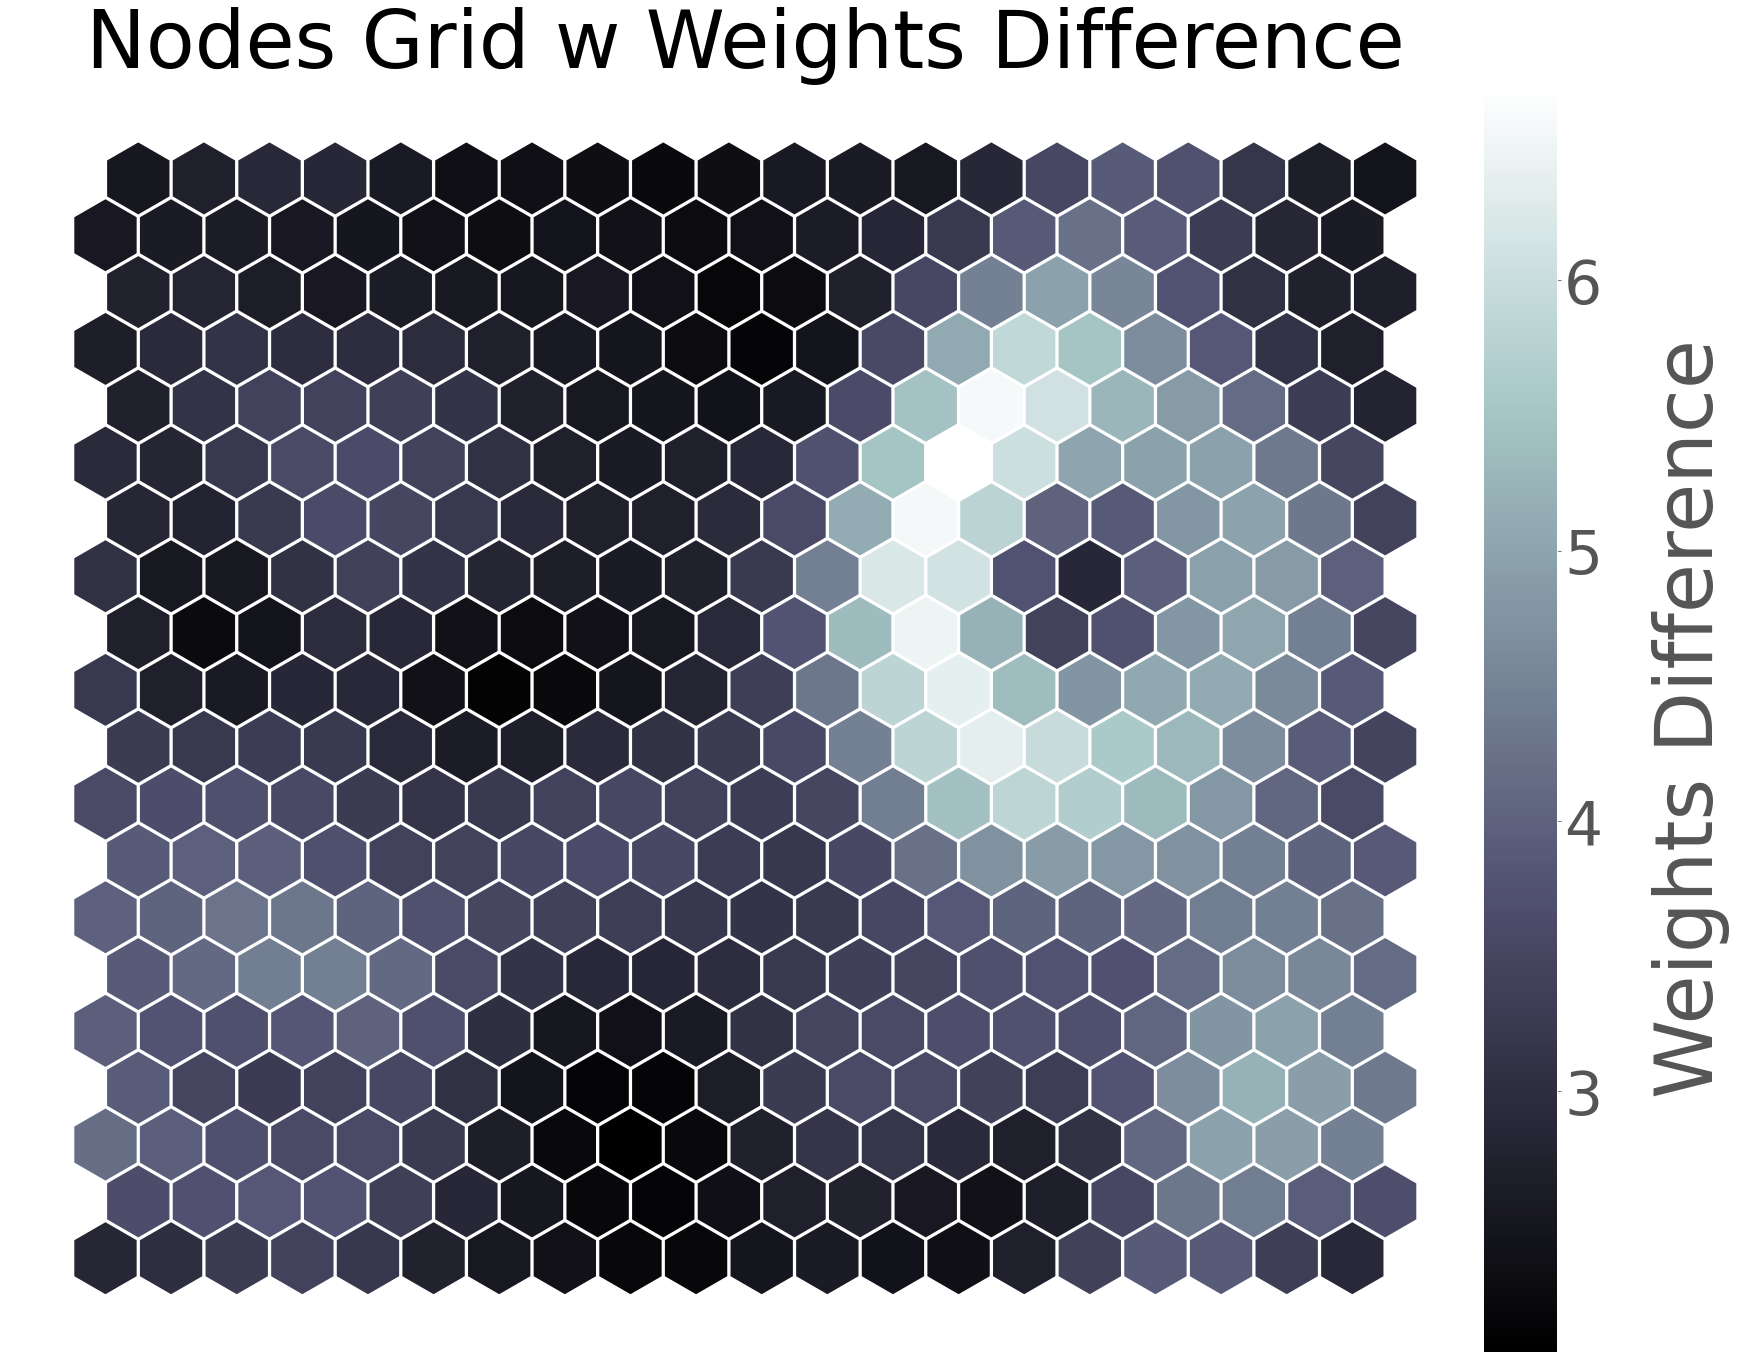

In [ ]:
# Node map colored by feature (e.g., column 5)
net.nodes_graph(colnum=5)

# Distance graph (U-matrix)
net.diff_graph()

In [ ]:
X_scaled.shape

(800, 11)

In [ ]:
#get cluster dat
net.cluster(X_scaled, type='qthresh')

####Define Clusters

In [ ]:
obj = [[399,  415,  423,  435,  437,  440,  447,  448,  459,  471,  476,  483,  487,  490,  499,  501,
  502,  503,  504,  506,  507,  508,  510,  511,  516,  517,  519,  523,  524,  525,  528,  529,
  530,  531,  533,  534,  535,  536,  537,  538,  542,  545,  547,  549,  553,  554,  556,  558,
  559,  561,  562,  563,  565,  566,  567,  568,  570,  572,  573,  574,  575,  576,  578,  580,
  583,  584,  586,  587,  588,  590,  591,  592,  593,  597,  598,  599,  600,  601,  602,  603,
  604,  606,  607,  609,  611,  612,  613,  614,  617,  618,  619,  621,  623,  625,  626,  628,
  629,  630,  631,  633,  634,  635,  637,  638,  639,  640,  641,  642,  643,  644,  645,  646,
  647,  648,  650,  651,  652,  653,  655,  656,  657,  658,  659,  660,  661,  662,  663,  664,
  665,  666,  667,  669,  670,  671,  672,  675,  677,  678,  679,  680,  681,  683,  684,  687,
  688,  689,  690,  691,  693,  694,  695,  696,  697,  698,  699,  702,  704,  706,  707,  708,
  710,  711,  712,  713,  714,  716,  717,  718,  720,  722,  723,  724,  725,  726,  727,  730,
  731,  732,  733,  734,  735,  736,  738,  739,  740,  742,  743,  744,  745,  746,  747,  748,
  749,  750,  752,  753,  754,  755,  756,  757,  758,  760,  761,  763,  764,  765,  766,  767,
  768,  769,  770,  771,  772,  773,  774,  775,  776,  777,  778,  779,  780,  782,  783,  784,
  786,  788,  789,  790,  792,  794,  795,  796,  797,  798,  799],

 [63,  68,  69,  75,  76,  79,  80,  81,  85,  86,  89,  92,  96,  97,  98,  99,
  102,  103,  104,  106,  109,  111,  114,  115,  117,  119,  122,  124,  126,  128,  129,  130,
  131,  132,  133,  134,  135,  136,  137,  138,  140,  141,  142,  143,  144,  145,  146,  147,
  150,  153,  156,  158,  159,  161,  162,  163,  164,  165,  166,  167,  171,  173,  176,  177,
  179,  181,  182,  184,  185,  187,  190,  191,  192,  194,  195,  196,  198,  199,  201,  206,
  208,  214,  215,  219,  222,  223,  225,  226,  227,  228,  230,  233,  234,  238,  248,  249,
  251,  258,  259,  263,  264,  266,  269,  271,  275,  286,  288,  291,  292,  296,  297,  305,
  307,  308,  310,  311,  312,  315,  316,  317,  319,  323,  331,  332,  333,  337,  343,  345,
  350,  352,  353,  355,  356,  361,  365,  369,  370,  371,  373,  381,  383,  384,  386,  390,
  393,  397,  400,  401,  405,  410,  414,  417,  424,  426,  427,  429,  430,  433,  439,  443,
  449,  453,  454,  460,  462,  465,  466,  467,  475,  478,  481,  482,  485,  491,  492,  494,
  496,  505,  509,  515,  520,  521,  522,  527,  539,  548,  551,  552,  564,  569,  577,  581,
  582,  585,  589,  595,  596,  624,  632,  673,  685,  701,  719,  721,  728,  729,  737,  751,
  781,  787,  791],

 [0,  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,
  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  46,  47,  48,
  51,  52,  53,  54,  55,  56,  57,  58,  59,  61,  64,  65,  66,  70,  71,  72,
  73,  82,  83,  84,  87,  88,  90,  94,  95,  100,  101,  105,  110,  112,  113,  116,
  120,  121,  139,  148,  151,  152,  154,  157,  160,  169,  175,  180,  203,  204,  205,  210,
  216,  218,  224,  232,  236,  237,  239,  240,  241,  244,  245,  246,  247,  252,  253,  260,
  262,  272,  273,  274,  276,  282,  285,  298,  301,  324,  326,  328,  329,  336,  338,  346,
  348,  358,  360,  380,  387,  432,  438,  445,  446,  457,  480,  498,  526,  532,  540,  543,
  557,  560,  594],

 [77,  93,  107,  118,  125,  149,  155,  170,  172,  174,  178,  186,  188,  189,  197,  202,
  207,  212,  217,  221,  229,  235,  242,  250,  254,  255,  257,  265,  270,  278,  279,  283,
  284,  290,  293,  300,  309,  314,  322,  325,  335,  339,  342,  344,  349,  357,  359,  366,
  368,  372,  375,  377,  379,  382,  389,  394,  396,  398,  402,  404,  409,  412,  416,  419,
  420,  421,  422,  431,  441,  444,  455,  456,  464,  473,  479,  484,  497,  500,  512,  513,
  514,  518,  541,  550,  571,  605,  608,  610,  616,  620,  622,  627,  649,  674,  692,  703,
  705,  709,  715,  759,  793],

 [45,  49,  50,  60,  62,  67,  74,  78,  91,  108,  127,  168,  183,  193,  211,  213,
  220,  231,  243,  256,  261,  267,  268,  277,  280,  281,  287,  289,  294,  295,  299,  306,
  313,  318,  320,  327,  334,  340,  341,  347,  362,  363,  364,  374,  378,  385,  391,  392,
  395,  407,  408,  411,  413,  425,  428,  436,  442,  450,  451,  452,  468,  469,  474,  477,
  486,  488,  489,  555,  615,  682],

 [200,  302,  303,  304,  330,  351,  354,  367,  376,  388,  403,  406,  418,  434,  458,  461,
  463,  470,  472,  493,  544,  546,  579,  636,  654,  668,  676,  686,  700,  741,  762,  785],

 [123, 209, 321, 495]]

####Prepare Cluster Data

In [ ]:
# Convert each cluster into (x,y) pairs for plotting
g0 = ([0]*len(obj[0]), obj[0])
g1 = ([1]*len(obj[1]), obj[1])
g2 = ([2]*len(obj[2]), obj[2])
g3 = ([3]*len(obj[3]), obj[3])
g4 = ([4]*len(obj[4]), obj[4])
g5 = ([5]*len(obj[5]), obj[5])
g6 = ([6]*len(obj[6]), obj[6])

clusters_data = (g0, g1, g2, g3, g4, g5, g6)
colors = ("red","green","blue","yellow","black","grey","orange")
labels = ("Cluster 1","Cluster 2","Cluster 3","Cluster 4","Cluster 5","Cluster 6","Cluster 7")

####Plot Clusters

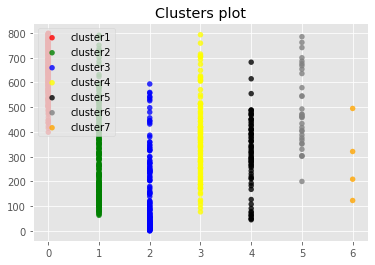

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

for data, color, label in zip(clusters_data, colors, labels):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors="none", s=30, label=label)

plt.title("SOM Clusters Plot")
plt.xlabel("Cluster ID")
plt.ylabel("Data Index")
plt.legend(loc="upper left")
plt.show()

###Projection to 2D Map

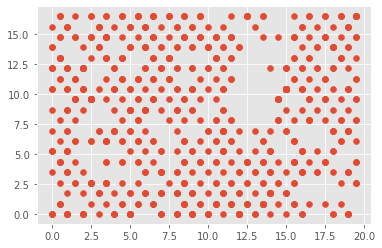

In [ ]:
prj = np.array(net.project(X_scaled))
plt.scatter(prj.T[0], prj.T[1])
plt.title("Projection of Data Points on SOM Map")
plt.show()

###KMeans on SOM Projections

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)
original_data["clusters"] = kmeans.labels_

# Inspect cluster assignments

In [ ]:
original_data[original_data["clusters"]==0].head(5)

world_rank  country  teaching  ...  female%  male%  clusters
university_name                                        ...                          
University of Tübingen          78  Germany      47.0  ...     58.0   42.0         0
University of Bonn              94  Germany      45.1  ...     55.0   45.0         0
University of Mannheim         106  Germany      34.5  ...     55.0   45.0         0
University of Münster          125  Germany      40.3  ...     53.0   47.0         0
University of Cologne          156  Germany      42.2  ...     60.0   40.0         0

[5 rows x 14 columns]

In [ ]:
original_data[original_data["clusters"]==1].head(5)

world_rank  ... clusters
university_name                                    ...         
California Institute of Technology              1  ...        1
University of Oxford                            2  ...        1
Stanford University                             3  ...        1
University of Cambridge                         4  ...        1
Massachusetts Institute of Technology           5  ...        1

[5 rows x 14 columns]

In [ ]:
original_data[original_data["clusters"]==2].head(5)

world_rank  ... clusters
university_name                              ...         
University of St Andrews                 86  ...        2
University of Exeter                     93  ...        2
Queen Mary University of London          98  ...        2
Rice University                         101  ...        2
University of Zurich                    104  ...        2

[5 rows x 14 columns]

### MiniSom Implementation

In [ ]:
# %pip install MiniSom

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom

dataset = pd.read_csv("data/times.csv")

# Drop identifiers
df = dataset.drop(["world_rank","university_name","country"], axis=1)

# Fill missing values
df = df.fillna(df.mean())

# Add binary target column "chances"
df.insert(11,"chances",0,True)
df.loc[df["total_score"] > 63, "chances"] = 1
df.loc[df["total_score"] <= 63, "chances"] = 0

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Normalize features
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

# Train MiniSom (10x10 grid, 100 iterations)
som = MiniSom(x=10, y=10, input_len=11, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

###MiniSom Visualization

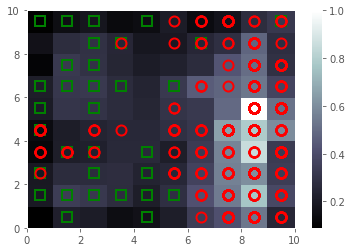

In [ ]:
from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()

markers = ["o","s"]
colors = ["r","g"]

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor="None",
         markersize=10,
         markeredgewidth=2)

plt.title("MiniSom Distance Map with Clusters")
show()

###Quantile Example

In [ ]:
df["total_score"].quantile(0.5)

62.51999999999998

## Classification — MLPClassifier
We train a multi‑layer perceptron (MLP) neural network to classify universities into three levels (high, medium, low) based on performance indicators, evaluate accuracy, and visualize results with a confusion matrix.


###Imports & Accuracy Function

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Accuracy function from confusion matrix
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

###Load & Prepare Data

In [ ]:
dataset = pd.read_csv("data/times.csv")

# Drop identifiers
df = dataset.drop(["world_rank","university_name","country"], axis=1)

# Fill missing values with column means
df = df.fillna(df.mean())

# Add target column "Level"
df.insert(11,"Level",0,True)
df.loc[df["total_score"] > 90, "Level"] = 0   # High
df.loc[df["total_score"] <= 90, "Level"] = 1  # Medium
df.loc[df["total_score"] <= 70, "Level"] = 2  # Low

df.head(15)

teaching  international  research  ...    female%      male%  Level
0       95.6           64.0      97.6  ...  33.000000  67.000000      0
1       86.5           94.4      98.9  ...  46.000000  54.000000      0
2       92.5           76.3      96.2  ...  42.000000  58.000000      0
3       88.2           91.5      96.7  ...  46.000000  54.000000      0
4       89.4           84.0      88.6  ...  37.000000  63.000000      0
5       83.6           77.2      99.0  ...  49.538043  50.461957      0
6       85.1           78.5      91.9  ...  45.000000  55.000000      0
7       83.3           96.0      88.5  ...  37.000000  63.000000      1
8       77.0           97.9      95.0  ...  31.000000  69.000000      1
9       85.7           65.0      88.9  ...  42.000000  58.000000      1
10      77.6           70.0      90.4  ...  50.000000  50.000000      1
11      86.5           64.3      87.8  ...  50.000000  50.000000      1
12      80.4           61.9      91.1  ...  50.000000  50.000000      1
13      78.1           94.4      91.0  ...  56.000000  44.000000      1
14      85.9           73.5      82.2  ...  49.538043  50.461957      1

[15 rows x 12 columns]

###Features & Scaling

In [ ]:
y = df["Level"]
X = df[[
    "teaching","international","research","citations","income","total_score",
    "num_students","student_staff_ratio","international%","female%","male%"
]]

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

teaching  international  research  ...  international%   female%     male%
0  4.274564       0.654655  3.558974  ...        1.348510 -1.442358  1.442358
1  3.666926       1.938656  3.625572  ...        2.008736 -0.308569  0.308569
2  4.067566       1.174169  3.487253  ...        0.876919 -0.657427  0.657427
3  3.780441       1.816169  3.512867  ...        2.008736 -0.308569  0.308569
4  3.860569       1.499393  3.097910  ...        1.914418 -1.093500  1.093500

[5 rows x 11 columns]

###Train/Test Split & Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

from sklearn.neural_network import MLPClassifier

# Initialize MLPClassifier with 3 hidden layers
classifier = MLPClassifier(
    hidden_layer_sizes=(150,100,50),
    max_iter=300,
    activation="relu",
    solver="adam",
    random_state=1
)

# Train model
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

###Confusion Matrix & Visualization

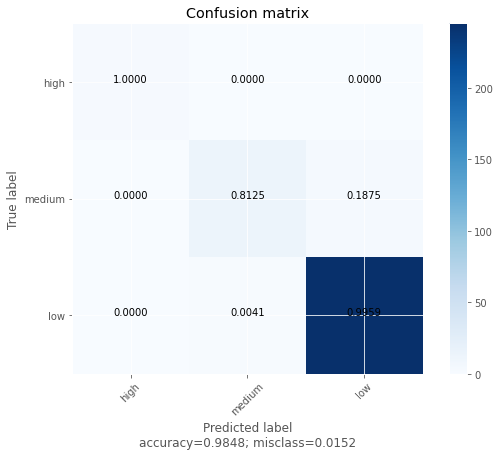

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)

def plot_confusion_matrix(cm, target_names, title="Confusion Matrix", cmap=None, normalize=True):
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype("float")
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap("Blues")

    plt.figure(figsize=(8,6))
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:0.4f}".format(cm[i, j]) if normalize else "{:,}".format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel(f"Predicted label\naccuracy={accuracy:.4f}; misclass={misclass:.4f}")
    plt.show()

labels = ["high","medium","low"]
plot_confusion_matrix(cm, labels)

###Accuracy

In [ ]:
print("Accuracy of MLPClassifier:", accuracy(cm))

Accuracy of MLPClassifier :  0.9848484848484849


###Example Prediction

In [ ]:
example = [[4.274564, 0.654655, 3.558974, 1.794039, 2.536181,
            5.441943, -0.976050, -0.980509, 1.348510, -1.442358, 1.442358]]

pred = classifier.predict(example)
print("Predicted Level:", pred[0])
print("Actual Level:", y.iloc[0])

[0]
0


## Regression — MLPRegressor
We train a multi‑layer perceptron (MLP) regressor to predict university total scores from performance indicators, evaluate predictions, and compute R² accuracy.


###Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

###Load & Clean Data

In [ ]:
dataset = pd.read_csv("data/shanghaiData.csv")

# Drop non-numeric identifiers
dataset = dataset.drop(["university_name","national_rank","world_rank","year"], axis=1)

# Impute missing values with column means
means = dataset.mean().to_dict()
for m in means:
    dataset[m] = dataset[m].fillna(value=means[m])

dataset.head()

###Features & Target

In [ ]:
y = dataset["total_score"]
X = dataset[["alumni","award","hici","ns","pub","pcp"]]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
X.head()

###Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1
)

###Train MLPRegressor

In [ ]:
mlp_regressor = MLPRegressor(random_state=1, max_iter=400)
mlp_regressor.fit(X_train, y_train)
mlp_regressor

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=400,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

###Predictions

In [ ]:
predictions = mlp_regressor.predict(X_test)
predictions[:10]   # show first 10 predictions

array([36.34961408, 33.3289249 , 36.18004703, ..., 36.62529839,
       36.53149134, 69.71080594])

###R² Score

In [ ]:
r2_score = mlp_regressor.score(X_test, y_test)
print(f"R² Score on Test Data: {r2_score:.3f}")

0.9705570546600869